# **Subway vs. McDonald's: Is "Healthy" More Than Just Marketing?**

## **Problem Statement and Background Information**

Global fast food consumption has changed dietary patterns and sparked heated discussions about health. Approximately 19% of children and more than 42% of adults in the United States are obese, according to data from the National Health and Nutrition Examination Survey. Twenty states now have obesity rates above 35%, which is a significant increase from 15 states the year before. Ten years ago, no state had obesity rates above this level. Serious health problems like diabetes, heart disease, stroke, and malignancies like breast and colon cancer are all associated with this syndrome. The financial toll is enormous; in 2019, obesity-related medical expenses totaled over $175 billion.

McDonald's and Subway represent opposing fast food narratives against this backdrop. Founded in 1940, McDonald's is well-known for its high-calorie menu items, such as burgers and fries, which are frequently blamed for promoting unhealthy eating habits. With its "Eat Fresh" tagline, Subway, which debuted in 1965, markets itself as a better choice by highlighting fresh veggies, customizable subs, and lower-calorie meals through its Fresh Fit line.

This analysis poses a key question: 
**Does Subway genuinely offer a healthier alternative to McDonald's, or is its health image a marketing facade?** 
By examining nutritional data from both brands’ offerings, we will determine if the health differences are meaningful or largely a branding tactic.

![McDonald's Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/McDonald%27s_Golden_Arches.svg/1200px-McDonald%27s_Golden_Arches.svg.png?width=200) ![Subway Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Subway_2016_logo.svg/1200px-Subway_2016_logo.svg.png?width=200)



In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df_mc_1   = pd.read_csv("menu.csv")
df_sub_1  = pd.read_csv("Subway.csv")

In [3]:
len(df_mc_1), len(df_sub_1)

(260, 177)

In [4]:
pd.set_option('display.max_columns', None)  

print("\n1. MCDONALD'S MENU:")
print("-" * 40)
print(f"Number of cols: {len(df_mc_1.columns)}")
print("Columns:")
for i, col in enumerate(df_mc_1.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n2. SUBWAY Menu:")
print("-" * 40)
print(f"Number of cols: {len(df_sub_1.columns)}")
print("Columns:")
for i, col in enumerate(df_sub_1.columns, 1):
    print(f"  {i:2d}. {col}")

print("\n" + "=" * 80)
print(f"- McDonald's: {len(df_mc_1.columns)} col")
print(f"- Subway: {len(df_sub_1.columns)} col")
print("=" * 80)


1. MCDONALD'S MENU:
----------------------------------------
Number of cols: 24
Columns:
   1. Category
   2. Item
   3. Serving Size
   4. Calories
   5. Calories from Fat
   6. Total Fat
   7. Total Fat (% Daily Value)
   8. Saturated Fat
   9. Saturated Fat (% Daily Value)
  10. Trans Fat
  11. Cholesterol
  12. Cholesterol (% Daily Value)
  13. Sodium
  14. Sodium (% Daily Value)
  15. Carbohydrates
  16. Carbohydrates (% Daily Value)
  17. Dietary Fiber
  18. Dietary Fiber (% Daily Value)
  19. Sugars
  20. Protein
  21. Vitamin A (% Daily Value)
  22. Vitamin C (% Daily Value)
  23. Calcium (% Daily Value)
  24. Iron (% Daily Value)

2. SUBWAY Menu:
----------------------------------------
Number of cols: 13
Columns:
   1. Category
   2. Item Name
   3. Serving Size(g)
   4. Energy(kJ)
   5. Energy(kCal)
   6. Protein(g)
   7. Fat,Total(g)
   8. Sat.Fat(g)
   9. Carb(g)
  10. Sugars(g)
  11. Dietary Fiber (g)
  12. Sodium (mg)
  13. Description

- McDonald's: 24 col
- Subway: 13

In [28]:
df_mc_1.head(3)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value),ServingSize_g
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15,136
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8,135
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10,111


In [29]:
df_sub_1.head(3)

,Category,Item Name,Serving Size(g),Energy(kJ),Energy(kCal),Protein(g),"Fat,Total(g)",Sat.Fat(g),Carb(g),Sugars(g),Dietary Fiber (g),Sodium (mg),Description
0,Subway 6-Inch® Subs,BBQ Southern Style Chicken,100,844.0,201.0,8.1,6.7,2.2,26.3,5.3,1.4,681.0,"old English-style processed cheese, spinach, t..."
1,Subway 6-Inch® Subs,Chicken & Bacon Ranch,100,761.0,182.0,11.3,8.2,2.7,15.2,2.2,1.2,372.0,"chicken strips, bacon, natural cheddar cheese,..."
2,Subway 6-Inch® Subs,Chicken Classic,100,832.0,199.0,9.0,9.2,2.9,19.2,2.8,2.0,569.0,"old English-style processed cheese, lettuce, t..."


* Before that, the serving sizes are mixed between imperial and metric units

* Thus, let's clean the data by extracting metric units wherever possible else convert the imperial units into metric (e.g. fl oz to ml) to ensure uniformity

* Select the shared columns between the two datasets to create a single dataset for simpler comparison and analysis.


In [ ]:
def parse_serving_size(val):
    """
    - "4.8 oz (136 g)"
    - "1 sandwich (230 g)"
    - "1 cookie (33 g)"
    - "16 fl oz cup"
    - "1 carton (236 ml)"
    - "16.9 fl oz"
    """
    if pd.isna(val):
        return None

    val = str(val).lower().strip()

    match_paren_g = re.search(r"\((\d+)\s*g\)", val)
    if match_paren_g:
        return int(match_paren_g.group(1))

    # 2. Gram 
    match_g = re.search(r"(\d+)\s*g", val)
    if match_g:
        return int(match_g.group(1))

    # 3. Fluid ounce 
    match_fl_oz = re.search(r"([\d.]+)\s*fl\s*oz", val)
    if match_fl_oz:
        fl_oz = float(match_fl_oz.group(1))
        return int(round(fl_oz * 29.57))  # ~ g

    # 4. Milliliter ( 1 ml ~ 1 g)
    match_ml = re.search(r"(\d+)\s*ml", val)
    if match_ml:
        return int(match_ml.group(1))

    # 5. Ounce (oz)
    match_oz = re.search(r"([\d.]+)\s*oz", val)
    if match_oz:
        oz = float(match_oz.group(1))
        return int(round(oz * 28.35))

    return None

df_mc_1["ServingSize_g"] = df_mc_1["Serving Size"].apply(parse_serving_size)


In [6]:
df_mc = pd.DataFrame({
    "Brand": "McDonalds",
    "Category": df_mc_1["Category"],
    "Item": df_mc_1["Item"],
    "ServingSize_g": df_mc_1["ServingSize_g"],  
    "Calories": df_mc_1["Calories"],
    "Fat_g": df_mc_1["Total Fat"],
    "SatFat_g": df_mc_1["Saturated Fat"],
    "Sodium_mg": df_mc_1["Sodium"],
    "Carbs_g": df_mc_1["Carbohydrates"],
    "Fiber_g": df_mc_1["Dietary Fiber"],
    "Sugars_g": df_mc_1["Sugars"],
    "Protein_g": df_mc_1["Protein"]
})
df_sub = pd.DataFrame({
    "Brand": "Subway",
    "Category": df_sub_1["Category"],
    "Item": df_sub_1["Item Name"],
    "ServingSize_g": df_sub_1["Serving Size(g)"],
    "Calories": df_sub_1["Energy(kCal)"],
    "Fat_g": df_sub_1["Fat,Total(g)"],
    "SatFat_g": df_sub_1["Sat.Fat(g)"], 
    "Sodium_mg": df_sub_1["Sodium (mg)"],
    "Carbs_g": df_sub_1["Carb(g)"],
    "Fiber_g": df_sub_1["Dietary Fiber (g)"],
    "Sugars_g": df_sub_1["Sugars(g)"],
    "Protein_g": df_sub_1["Protein(g)"]
})


In [7]:
df_mc.head()

,Brand,Category,Item,ServingSize_g,Calories,Fat_g,SatFat_g,Sodium_mg,Carbs_g,Fiber_g,Sugars_g,Protein_g
0,McDonalds,Breakfast,Egg McMuffin,136,300,13.0,5.0,750,31,4,3,17
1,McDonalds,Breakfast,Egg White Delight,135,250,8.0,3.0,770,30,4,3,18
2,McDonalds,Breakfast,Sausage McMuffin,111,370,23.0,8.0,780,29,4,2,14
3,McDonalds,Breakfast,Sausage McMuffin with Egg,161,450,28.0,10.0,860,30,4,2,21
4,McDonalds,Breakfast,Sausage McMuffin with Egg Whites,161,400,23.0,8.0,880,30,4,2,21


In [8]:
df_sub.tail()

,Brand,Category,Item,ServingSize_g,Calories,Fat_g,SatFat_g,Sodium_mg,Carbs_g,Fiber_g,Sugars_g,Protein_g
172,Subway,New,Chicken Pepperoni Subway 6-Inch® Sub,100,201.0,8.9,3.0,611.0,16.9,1.6,2.8,12.7
173,Subway,New,Deli Supreme Subway 6-Inch® Sub,100,214.0,10.6,3.7,565.0,16.8,2.2,2.3,12.0
174,Subway,New,Philly-Style Three-Cheese Steak Subway 6-Inch®...,100,246.0,11.7,4.7,673.0,19.8,1.6,2.8,14.0
175,Subway,New,Rotisserie-Style Chicken Subway 6-Inch® Sub,100,190.0,8.2,2.2,536.0,16.9,1.3,2.6,11.5
176,Subway,New,Ultimate Cheesy Garlic Bread Snack,100,355.0,19.4,8.4,472.0,32.8,2.0,2.5,11.8


In [9]:
df_master = pd.concat([df_mc, df_sub], ignore_index=True)

print(df_master.head())
print(df_master.tail())
print(df_master.columns)

       Brand   Category                              Item  ServingSize_g  \
0  McDonalds  Breakfast                      Egg McMuffin            136   
1  McDonalds  Breakfast                 Egg White Delight            135   
2  McDonalds  Breakfast                  Sausage McMuffin            111   
3  McDonalds  Breakfast         Sausage McMuffin with Egg            161   
4  McDonalds  Breakfast  Sausage McMuffin with Egg Whites            161   

   Calories  Fat_g  SatFat_g  Sodium_mg  Carbs_g  Fiber_g  Sugars_g  Protein_g  
0     300.0   13.0       5.0      750.0     31.0      4.0       3.0       17.0  
1     250.0    8.0       3.0      770.0     30.0      4.0       3.0       18.0  
2     370.0   23.0       8.0      780.0     29.0      4.0       2.0       14.0  
3     450.0   28.0      10.0      860.0     30.0      4.0       2.0       21.0  
4     400.0   23.0       8.0      880.0     30.0      4.0       2.0       21.0  
      Brand Category                                     

In [10]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brand          437 non-null    object 
 1   Category       437 non-null    object 
 2   Item           437 non-null    object 
 3   ServingSize_g  437 non-null    int64  
 4   Calories       437 non-null    float64
 5   Fat_g          437 non-null    float64
 6   SatFat_g       437 non-null    float64
 7   Sodium_mg      437 non-null    float64
 8   Carbs_g        437 non-null    float64
 9   Fiber_g        437 non-null    float64
 10  Sugars_g       437 non-null    float64
 11  Protein_g      437 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 41.1+ KB


In [11]:
df_master.duplicated().sum()

np.int64(0)

## Data cleaning & feature selection

#### Retrieve the main statistical metrics (mean, median, standard deviation, 25th percentile, 75th percentile, mode, maximum, minimum) of the numerical variables.


In [12]:
df_master.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,437,2,McDonalds,260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,437,27,Coffee & Tea,95,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,437,367,Veggie Delite® with Avo,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ServingSize_g,437.0,NaN,NaN,NaN,264.290618,210.612628,29.0,100.0,161.0,355.0,946.0
Calories,437.0,NaN,NaN,NaN,294.042105,215.954167,0.0,150.0,240.0,410.0,1880.0
Fat_g,437.0,NaN,NaN,NaN,12.179863,12.442123,0.0,3.5,9.0,19.0,118.0
SatFat_g,437.0,NaN,NaN,NaN,4.849886,4.852426,0.0,1.4,3.0,8.0,20.0
Sodium_mg,437.0,NaN,NaN,NaN,575.212128,1912.079889,0.0,140.0,324.0,707.0,39100.0
Carbs_g,437.0,NaN,NaN,NaN,34.998169,28.041003,0.0,14.0,30.0,50.0,141.0
Fiber_g,437.0,NaN,NaN,NaN,1.589931,1.530032,0.0,0.9,1.0,2.1,14.2


#### Overview information.

* Data lines: 437 dishes (including McDonald's and Subway).
* McDonald's has the most dishes among the two brands (260, or almost 60%).
* Food category: 27 categories, with Coffee & Tea being the most popular (95 dishes).
* The most popular dish is Veggie Delite® With Avocado. (6 times - perhaps different serving size options)
* The majority of dishes have typical calories, but there is a "super outlier" (1880 kcal, 39,100mg salt, 128g sugar).
* High sodium and sugar levels make many foods unsuitable.
* Despite its "Healthy" branding, Subway is no better than McDonald's in terms of carbs and sugar.


### Food Items with zero nutrient values


In [13]:
nutrient_cols = ["Calories", "Fat_g", "SatFat_g", "Sodium_mg", 
                 "Carbs_g", "Fiber_g", "Sugars_g", "Protein_g", "ServingSize_g"]

zero_mask = (df_master[nutrient_cols] == 0).any(axis=1)
df_zero = df_master[zero_mask]

print(f"Food items with zero nutrient values: {df_zero.shape[0]}")
df_zero

Food items with zero nutrient values: 137


,Brand,Category,Item,ServingSize_g,Calories,Fat_g,SatFat_g,Sodium_mg,Carbs_g,Fiber_g,Sugars_g,Protein_g
38,McDonalds,Breakfast,Hash Brown,56,150.0,9.0,1.5,310.0,15.0,2.0,0.0,1.0
78,McDonalds,Chicken & Fish,Chicken McNuggets (4 piece),65,190.0,12.0,2.0,360.0,12.0,1.0,0.0,9.0
79,McDonalds,Chicken & Fish,Chicken McNuggets (6 piece),97,280.0,18.0,3.0,540.0,18.0,1.0,0.0,13.0
80,McDonalds,Chicken & Fish,Chicken McNuggets (10 piece),162,470.0,30.0,5.0,900.0,30.0,2.0,0.0,22.0
81,McDonalds,Chicken & Fish,Chicken McNuggets (20 piece),323,940.0,59.0,10.0,1800.0,59.0,3.0,0.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...
424,Subway,Vegetables,Pickle (3 wheels),100,14.9,0.2,0.1,1200.0,2.0,1.5,0.0,0.3
425,Subway,Vegetables,Pineapple (Selected Locations Only),100,81.3,0.1,0.0,3.0,18.5,0.0,18.5,0.4
427,Subway,Vegetables,Tomato (3 wheels),100,18.0,0.2,0.0,5.0,2.7,1.2,2.6,0.9
428,Subway,Seasonings,Pepper,100,289.0,2.7,0.1,25.0,42.1,0.0,0.6,8.8


In [14]:
df_zero_all = df_master[(df_master[nutrient_cols] == 0).all(axis=1)]
print("\nItems with ALL zero values:")
print(df_zero_all[["Brand","Category","Item"]])


Items with ALL zero values:
Empty DataFrame
Columns: [Brand, Category, Item]
Index: []


* The dataset contains 137 items with at least one nutrient value of zero, but no item has all nutrients missing. 
* These zeros mostly reflect the actual composition of specific foods (e.g., no sugars in chicken nuggets, no calories in salt) rather than data errors. 
* Salt (100g) has 39,100mg sodium → a significant outlier, likely representing pure seasoning rather than a realistic serving size.
* Pickles, olives, jalapenos ... also have high sodium, while calories/fat are nearly zero, consistent with their preservation process.
* To reflect realistic consumption, this analysis excludes extreme outliers like 100g salt from sodium comparisons, as typical sandwich servings contain far less (e.g., <1g salt per serving). This adjustment ensures a fairer comparison of sodium levels between brands.

### Food Items with extremely high nutrient values


#### Refer to the UK FSA Traffic Light, in accordance with WHO/FAO recommendations.

* Calories: > 275 kcal/100 g indicates high energy density.
* Fat: > 17.5 g/100 g = high fat.
* Saturated fat: > 5 g/100 g indicates significant saturated fat.
* Sugar: > 22.5 g/100 g indicates a high sugar level.
* Sodium: > 600 mg/100 g = excessive sodium.
* Protein: > 5 g/100 g is sufficient (below is considered insufficient protein).
* Fiber content: > 3 g/100 g indicates a good source of fiber.

In [15]:
THRESHOLDS = {
    "Calories_kcal_per100": 275,    # >275 kcal/100g -> high energy density, per 100 g thresholds for “high”
    "Fat_g_per100": 17.5,
    "SatFat_g_per100": 5.0,
    "Sugars_g_per100": 22.5,
    "Sodium_mg_per100": 600.0,
    "Protein_g_per100_min_good": 5.0,
    "Fiber_g_per100_min_good": 3.0
}

def normalize_to_per100g(df, serving_col='ServingSize_g', nutrient_cols=None, output_suffix='_per100'):
    """
    Normalize nutrients to per 100g for McDonald's only.
    Subway data is already normalized.
    """
    df = df.copy()
    if nutrient_cols is None:
        nutrient_cols = ['Calories','Fat_g','SatFat_g','Sugars_g','Sodium_mg','Carbs_g','Fiber_g','Protein_g']

    # Only normalize for McDonald's
    mask_mc = df['Brand'] == 'McDonalds'
    for col in nutrient_cols:
        newcol = f"{col}{output_suffix}"
        df[newcol] = np.where(
            mask_mc & (df[serving_col].notna()) & (df[serving_col] > 0),
            df[col] / df[serving_col] * 100.0,
            df[col]  # Subway: keep original value (already per 100g)
        )
    df['__serving_col_used'] = serving_col
    return df

# Example usage:
nutrients = ['Calories','Fat_g','SatFat_g','Sugars_g','Sodium_mg','Carbs_g','Fiber_g','Protein_g']
df = normalize_to_per100g(df_master, serving_col='ServingSize_g', nutrient_cols=nutrients)

In [16]:
def traffic_light_label_per_nutrient(value, nutrient_key):
    """
    nutrient_key matches keys in THRESHOLDS dict naming.
    We'll return 'High' if > threshold, 'Low' or 'Good' otherwise.
    For protein/fiber use >= min_good -> 'Good' else 'Low'
    """
    if pd.isna(value):
        return np.nan
    if nutrient_key == 'Protein_g_per100_min_good':
        return 'Good' if value >= THRESHOLDS[nutrient_key] else 'Low'
    if nutrient_key == 'Fiber_g_per100_min_good':
        return 'Good' if value >= THRESHOLDS[nutrient_key] else 'Low'
    # generic greater-than threshold -> High
    threshold = THRESHOLDS.get(nutrient_key)
    if threshold is None:
        return np.nan
    return 'High' if value > threshold else 'Low/Acceptable'

def add_traffic_light_columns(df):
    df = df.copy()
    # Consistent flag: 'High' or 'Not High'
    df['Energy_density_flag'] = df['Calories_per100'].apply(lambda v: 'High' if pd.notna(v) and v > THRESHOLDS['Calories_kcal_per100'] else ('Not High' if pd.notna(v) else np.nan))
    df['Fat_flag'] = df['Fat_g_per100'].apply(lambda v: 'High' if pd.notna(v) and v > THRESHOLDS['Fat_g_per100'] else ('Not High' if pd.notna(v) else np.nan))
    df['SatFat_flag'] = df['SatFat_g_per100'].apply(lambda v: 'High' if pd.notna(v) and v > THRESHOLDS['SatFat_g_per100'] else ('Not High' if pd.notna(v) else np.nan))
    df['Sugars_flag'] = df['Sugars_g_per100'].apply(lambda v: 'High' if pd.notna(v) and v > THRESHOLDS['Sugars_g_per100'] else ('Not High' if pd.notna(v) else np.nan))
    df['Sodium_flag'] = df['Sodium_mg_per100'].apply(lambda v: 'High' if pd.notna(v) and v > THRESHOLDS['Sodium_mg_per100'] else ('Not High' if pd.notna(v) else np.nan))
    df['Protein_flag'] = df['Protein_g_per100'].apply(lambda v: 'Good' if pd.notna(v) and v >= THRESHOLDS['Protein_g_per100_min_good'] else ('Not Good' if pd.notna(v) else np.nan))
    df['Fiber_flag']  = df['Fiber_g_per100'].apply(lambda v: 'Good' if pd.notna(v) and v >= THRESHOLDS['Fiber_g_per100_min_good'] else ('Not Good' if pd.notna(v) else np.nan))
    # Remove temp column if exists
    if '__serving_col_used' in df.columns:
        df.drop(columns='__serving_col_used', inplace=True)
    return df

df_main = add_traffic_light_columns(df)

# Show summary counts for items exceeding thresholds
flag_cols = ['Energy_density_flag', 'Fat_flag', 'SatFat_flag', 'Sugars_flag', 'Sodium_flag']
for col in flag_cols:
    print(f"\nItems with HIGH {col.replace('_flag','')}:")
    print(df_main[df_main[col] == 'High'].groupby('Brand')['Item'].count())

# Show all items exceeding any threshold
high_mask = df_main[flag_cols].eq('High').any(axis=1)
df_high = df_main.loc[high_mask, ['Brand', 'Category', 'Item'] + flag_cols]
print(f"\nNumber of items with extremely high nutrient values: {df_high.shape[0]}")
print(df_high)



Items with HIGH Energy_density:
Brand
McDonalds    34
Subway       33
Name: Item, dtype: int64

Items with HIGH Fat:
Brand
McDonalds    16
Subway       21
Name: Item, dtype: int64

Items with HIGH SatFat:
Brand
McDonalds    37
Subway       20
Name: Item, dtype: int64

Items with HIGH Sugars:
Brand
McDonalds    12
Subway       10
Name: Item, dtype: int64

Items with HIGH Sodium:
Brand
McDonalds    34
Subway       37
Name: Item, dtype: int64

Number of items with extremely high nutrient values: 125
         Brand    Category                                               Item  \
2    McDonalds   Breakfast                                   Sausage McMuffin   
3    McDonalds   Breakfast                          Sausage McMuffin with Egg   
6    McDonalds   Breakfast      Bacon, Egg & Cheese Biscuit (Regular Biscuit)   
7    McDonalds   Breakfast        Bacon, Egg & Cheese Biscuit (Large Biscuit)   
8    McDonalds   Breakfast  Bacon, Egg & Cheese Biscuit with Egg Whites (R...   
..         

According to weight-normalized data, the percentages of calorie-dense foods at McDonald's and Subway are similar (McDonald's: 34, Subway: 33 items per 100 g above 275 kcal). Nevertheless, this measure might change depending on portion sizes (Subway footlongs versus McD burgers, for example), indicating that per-serving analysis is necessary in subsequent research. With 37 high-saturated-fat foods compared to Subway's 20, McDonald's has a higher saturated fat risk, which is a serious cardiovascular health concern. Because Subway contains somewhat more high-fat (total fat) and high-sodium foods (Subway 21 has more fat than McDonald's 16; Subway 37 has more sodium than McDonald's 34), blood pressure issues may arise. Compared to Subway's 10 high-sugar items per 100 g, McDonald's 12 has a similar and lower-risk sugar concentration. At least one high-risk nutrient threshold is exceeded by 125 menu items from both brands combined, suggesting that frequent consumption without careful selection may lead to exceeding safe dietary limits.

### Accuracy of calories given


* Carbohydrates, protein, and fats are the macronutrients (macros) that contribute the most to calorie counts.

* We will now determine whether the calorie numbers provided in the dataset are valid by calculating Protein x 4, Carbohydrates x 4, and Total Fat x 9.
To convert macros to grams and calories to kcal, we will utilize the above conversion. The estimated calories will then be compared to the dataset's calories.

In [17]:
def compute_calorie_discrepancy(df, per100_suffix='_per100'):
    """
    Compare reported calories with calories calculated from macros (protein, carbs, fat).
    """
    df = df.copy()
    # Column names for per 100g values
    prot = 'Protein_g' + per100_suffix
    carbs = 'Carbs_g' + per100_suffix
    fat = 'Fat_g' + per100_suffix
    kcal = 'Calories' + per100_suffix

    # Calculate calories from macros
    df['calculated_kcal_from_macros'] = (
        4.0 * df[prot].fillna(0) +
        4.0 * df[carbs].fillna(0) +
        9.0 * df[fat].fillna(0)
    )

    # Percentage difference between reported and calculated calories
    df['calorie_pct_diff'] = np.where(
        df['calculated_kcal_from_macros'] > 0,
        (df[kcal] - df['calculated_kcal_from_macros']) / df['calculated_kcal_from_macros'] * 100.0,
        np.nan
    )
    return df

# Apply the function
df = df_main.copy()
df = compute_calorie_discrepancy(df)

# Show items with >20% discrepancy (can adjust threshold)
large_diff = df[df['calorie_pct_diff'].abs() > 20]
print("Items with >20% discrepancy between reported and macro-derived calories:", len(large_diff))
print(large_diff[['Brand', 'Item', 'Calories_per100', 'calculated_kcal_from_macros', 'calorie_pct_diff']].head(30))

Items with >20% discrepancy between reported and macro-derived calories: 9
         Brand                     Item  Calories_per100  \
122  McDonalds   Diet Dr Pepper (Small)              0.0   
123  McDonalds  Diet Dr Pepper (Medium)              0.0   
124  McDonalds   Diet Dr Pepper (Large)              0.0   
125  McDonalds   Diet Dr Pepper (Child)              0.0   
366     Subway       Mixed Berry Banana             42.0   
418     Subway                  Carrot              41.0   
424     Subway       Pickle (3 wheels)              14.9   
426     Subway                 Spinach              22.0   
428     Subway                  Pepper             289.0   

     calculated_kcal_from_macros  calorie_pct_diff  
122                     1.691332       -100.000000  
123                     1.932367       -100.000000  
124                     1.803833       -100.000000  
125                     1.126761       -100.000000  
366                    32.500000         29.230769  
418   

#### The results show 9 items with a discrepancy of more than 20% between calories calculated from macros and the calories reported in the dataset.

#### From the table, we can see that:
* Diet drinks (Diet Dr Pepper) have calories = 0 on the label, however the calories produced from macronutrients are somewhat higher (about 1-2 kcal/100 g). This is in line with actual labeling laws: in many areas, a product can be marketed as "calorie-free" if its energy content is less than 5 kcal/100 g, even though it may still include trace amounts of minerals or aspartame. There are variations of 25–35% in a few Subway vegetables, including pepper, spinach, pickles, and carrots.

* There are variations of 25–35% in a few Subway vegetables, including pepper, spinach, pickles, and carrots. Theoretical macro-based calorie calculations and actual nutrition facts may differ as a result of incomplete accounting for fiber or inherent variations in carbohydrate content (such as the water content in fresh produce). Fresh veggies frequently exhibit this kind of oscillation, which is consistent with agricultural data on nutritional changes.

* The Mixed Berry Banana Smoothie/Subway exhibits a roughly 30% discrepancy. Natural sugars, additional sugars, and soluble fiber can affect the measurement of calories in beverages; the straightforward macro × kcal conversion calculation frequently yields just an estimate. Based on a sample review of top-selling items, this discrepancy list does not include any key items (such as burgers, sandwiches like Big Macs or Subway 6-inch subs), indicating higher accuracy in high-energy products.


## Data Visualisation


In [18]:
df_main.head()

,Brand,Category,Item,ServingSize_g,Calories,Fat_g,SatFat_g,Sodium_mg,Carbs_g,Fiber_g,Sugars_g,Protein_g,Calories_per100,Fat_g_per100,SatFat_g_per100,Sugars_g_per100,Sodium_mg_per100,Carbs_g_per100,Fiber_g_per100,Protein_g_per100,Energy_density_flag,Fat_flag,SatFat_flag,Sugars_flag,Sodium_flag,Protein_flag,Fiber_flag
0,McDonalds,Breakfast,Egg McMuffin,136,300.0,13.0,5.0,750.0,31.0,4.0,3.0,17.0,220.588235,9.558824,3.676471,2.205882,551.470588,22.794118,2.941176,12.500000,Not High,Not High,Not High,Not High,Not High,Good,Not Good
1,McDonalds,Breakfast,Egg White Delight,135,250.0,8.0,3.0,770.0,30.0,4.0,3.0,18.0,185.185185,5.925926,2.222222,2.222222,570.370370,22.222222,2.962963,13.333333,Not High,Not High,Not High,Not High,Not High,Good,Not Good
2,McDonalds,Breakfast,Sausage McMuffin,111,370.0,23.0,8.0,780.0,29.0,4.0,2.0,14.0,333.333333,20.720721,7.207207,1.801802,702.702703,26.126126,3.603604,12.612613,High,High,High,Not High,High,Good,Good
3,McDonalds,Breakfast,Sausage McMuffin with Egg,161,450.0,28.0,10.0,860.0,30.0,4.0,2.0,21.0,279.503106,17.391304,6.211180,1.242236,534.161491,18.633540,2.484472,13.043478,High,Not High,High,Not High,Not High,Good,Not Good
4,McDonalds,Breakfast,Sausage McMuffin with Egg Whites,161,400.0,23.0,8.0,880.0,30.0,4.0,2.0,21.0,248.447205,14.285714,4.968944,1.242236,546.583851,18.633540,2.484472,13.043478,Not High,Not High,Not High,Not High,Not High,Good,Not Good


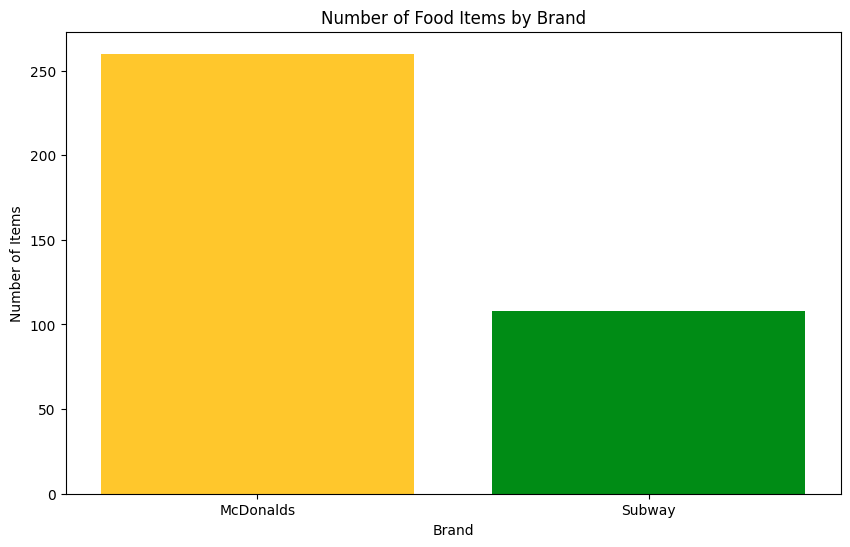

Brand
McDonalds    260
Subway       108
Name: Item, dtype: int64


In [19]:
different = df_main.groupby('Brand')['Item'].nunique()
plt.figure(figsize=(10,6))
plt.bar(different.index, different.values, color=['#FFC72C','#008C15'])
plt.title('Number of Food Items by Brand')
plt.ylabel('Number of Items')
plt.xlabel('Brand')
plt.show()
print(different)

In [20]:
summary = df_main.groupby('Brand').agg({
    'Calories_per100':['mean','median','std'],
    'Fat_g_per100':['median'],
    'SatFat_g_per100':['median'],
    'Sugars_g_per100':['median'],
    'Sodium_mg_per100':['median'],
    'Protein_g_per100':['median'],
    'Fiber_g_per100':['median'],
    'Carbs_g_per100':['median']
  
})
display(summary)

Calories_per100                         Fat_g_per100  \
                     mean      median         std       median   
Brand                                                            
McDonalds      140.522843  102.918587  107.942588     3.383379   
Subway         185.007910  178.000000  102.376397     7.700000   

          SatFat_g_per100 Sugars_g_per100 Sodium_mg_per100 Protein_g_per100  \
                   median          median           median           median   
Brand                                                                         
McDonalds        1.783524        5.461132        45.751006         2.816901   
Subway           2.500000        2.600000       394.000000         7.600000   

          Fiber_g_per100 Carbs_g_per100  
                  median         median  
Brand                                    
McDonalds        0.30722      14.084507  
Subway           1.20000      15.200000

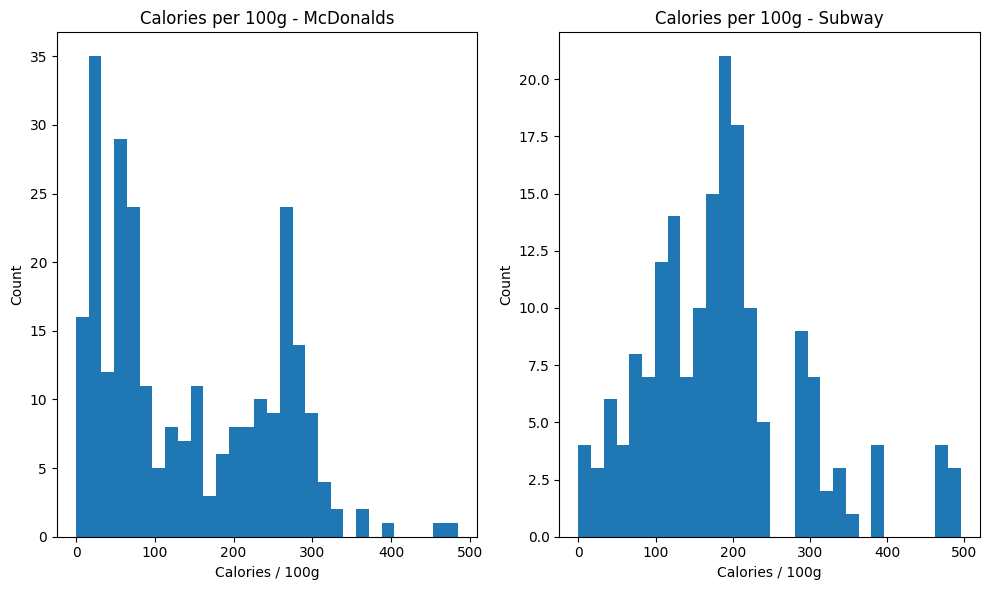

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10,6))
ax1 = axes[0]
ax1.hist(df.loc[df['Brand']=='McDonalds','Calories_per100'].dropna(), bins=30)
ax1.set_title('Calories per 100g - McDonalds')
ax1.set_xlabel('Calories / 100g')
ax1.set_ylabel('Count')
ax2 = axes[1]
ax2.hist(df.loc[df['Brand']=='Subway','Calories_per100'].dropna(), bins=30)
ax2.set_title('Calories per 100g - Subway')
ax2.set_xlabel('Calories / 100g')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

1. Calorie Density and Energy Distribution.

    * Calorie density: Compared to McDonald's (≈ 103 kcal/100 g), Subway has a higher median calorie density per 100 g (≈ 178 kcal/100 g).

    → Despite the "healthier" appearance of its menu, Subway can provide more energy per mouthful.
    
2. Fat & Saturated Fat

    * Fat vs. saturated fat: McDonald's has 3.4 g/100 g of median total fat, while Subway has 7.7 g/100 g. McDonald's displays more goods with saturated fat flags (37 vs. 20).

    → McDonald's has greater heart-risk saturated fat, although Subway often has more total fat (cheese, dressings, etc.).

3.  Sugar: Although both restaurants provide high-sugar desserts and beverages, McDonald's median sugar (5.5 g/100 g) is higher than Subway's (2.6 g/100 g); Subway cookies and some sauces are on par with McDonald's sweets.

4. Sodium (critical): The median sodium content of Subway (394 mg/100 g) is significantly higher than that of McDonald's (46 mg/100 g). Even after accounting for outliers (such seasonings), Subway's ranking is still higher, which could be dangerous. Hidden sodium in Subway's processed meats and sauces is a major worry.

5. Protein & Fiber: Subway often offers more protein and fiber (protein median slightly higher; fiber notably higher) – a nutritional advantage when choosing veggie-rich meals. 
    
6.  Variability of menu and risk range: * McDonald's = bimodal & extreme: many extremely high items (desserts, combinations) and many very low things (drinks, some salads), less extremes in "hidden" categories. Subway = "two-sided" but more constant medians: healthier selections (vegetables, salads) and higher-fat/sodium options (cheese, cookies, sauces).


C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3177515165.py:30: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3177515165.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


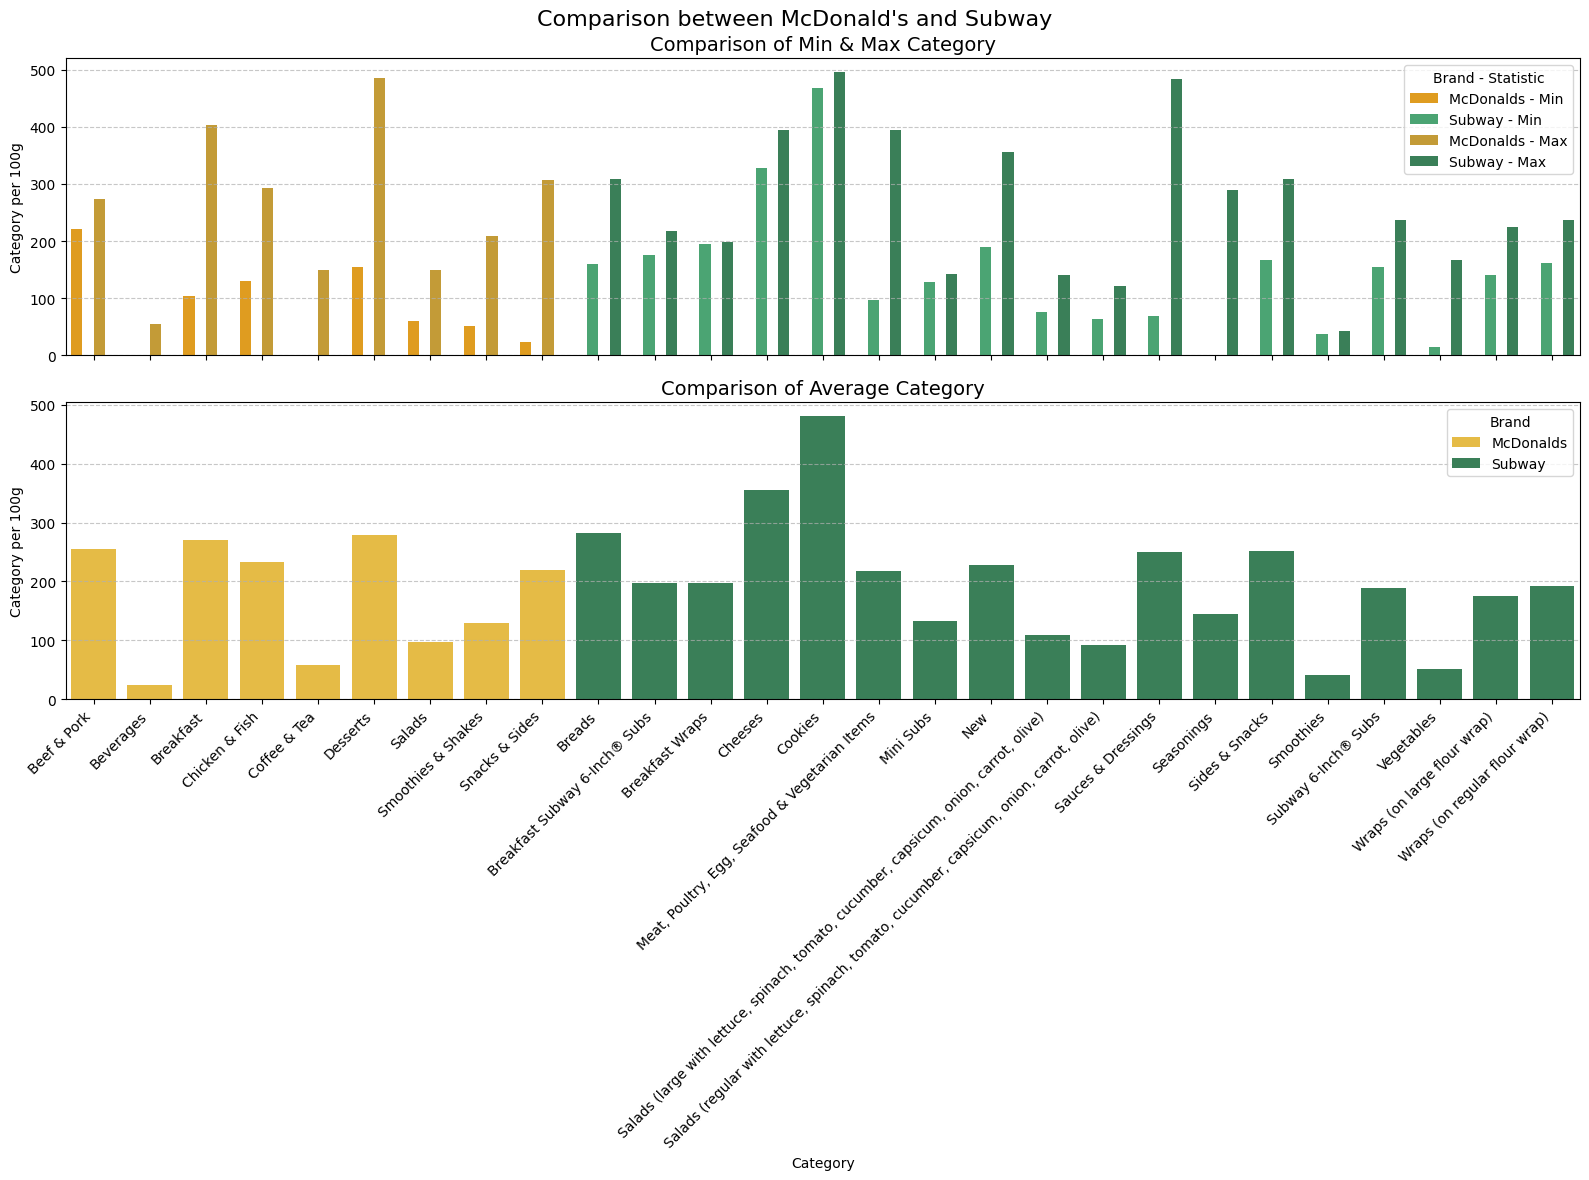

In [22]:
brand_palette = {"McDonalds": "#FFC72C", "Subway": "seagreen"}

group_palette = {
    "McDonalds - Min": "orange",
    "McDonalds - Max": "goldenrod",
    "Subway - Min": "mediumseagreen",
    "Subway - Max": "seagreen"
}

summary_stats = (
    df_main.groupby(['Brand', 'Category'])['Calories_per100']
    .agg(['min', 'mean', 'max'])
    .reset_index()
)

df_melted = summary_stats.melt(
    id_vars=['Brand', 'Category'], 
    value_vars=['min', 'mean', 'max'], 
    var_name='Statistic', value_name='Value'
)

df_minmax = df_melted[df_melted['Statistic'].isin(['min', 'max'])].copy()
df_mean = df_melted[df_melted['Statistic'] == 'mean'].copy()

df_minmax['Group'] = df_minmax['Brand'] + " - " + df_minmax['Statistic'].str.capitalize()

fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

# Subplot 1: Min & Max
sns.barplot(
    data=df_minmax, x="Category", y="Value", hue="Group",
    palette=group_palette, ci=None, ax=axes[0]
)
axes[0].set_title(f"Comparison of Min & Max Category", fontsize=14)
axes[0].set_ylabel(f"Category per 100g")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].legend(title="Brand - Statistic")

# Subplot 2: Mean
sns.barplot(
    data=df_mean, x="Category", y="Value", hue='Brand',
    palette=brand_palette, ci=None, ax=axes[1]
)
axes[1].set_title(f"Comparison of Average Category", fontsize=14)
axes[1].set_ylabel(f"Category per 100g")
axes[1].set_xlabel("Category")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].legend(title="Brand")

plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.suptitle(f"Comparison between McDonald's and Subway", 
                fontsize=16, y=0.98)

plt.tight_layout()
plt.show()




#### Range of variation (min-max)

* McDonalds: There are significant differences between groups, with items ranging from extremely low (salad, water) to quite high (dessert, fried food). This reinforces the preceding insight: McDonald's is extreme, allowing customers to "eat healthy" or "eat extremely unhealthy" at their discretion.

* Subway: Variations are more consistent, but Subway's maximum levels in many categories exceed McDonald's (cookies, cheese, breads).
    
#### Average (Per Category)

* Subway: Due to high-fat add-ons, many categories have significantly higher average fat content (e.g., cheese ~25 g/100 g, cookies ~20 g/100 g, dressings ~15 g/100 g). 
* McDonald's: Average fat categories typically contain 5-12 g/100 g, reflecting a balanced distribution across items. Although this is based on weight-normalized statistics (per 100g) and may change with portion sizes, McDonald's fat levels are more uniformly distributed, whereas Subway's higher averages are impacted by optional extras like cheese and condiments.

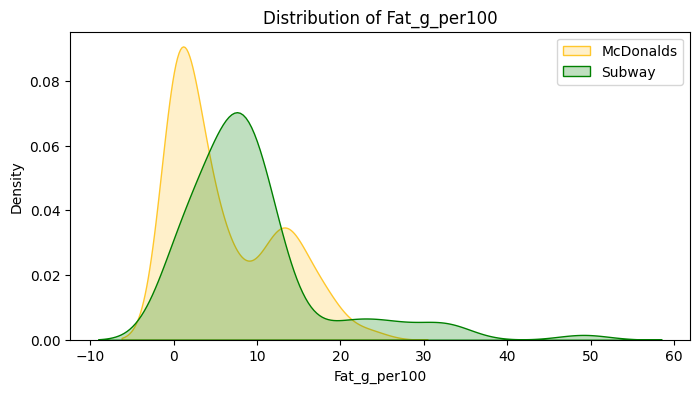

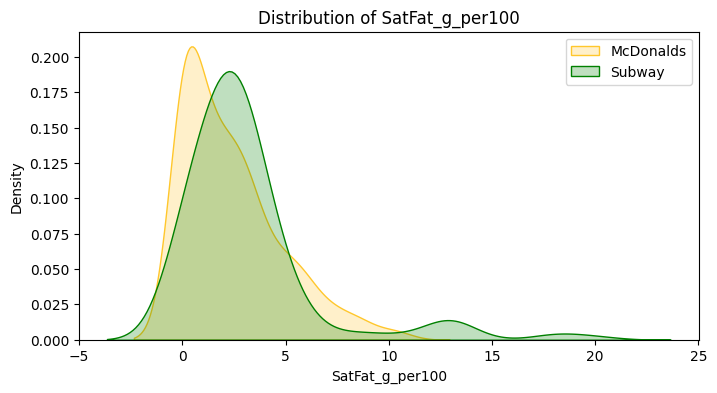

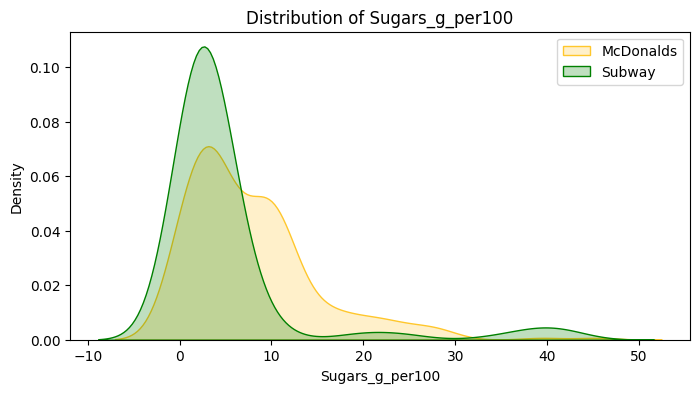

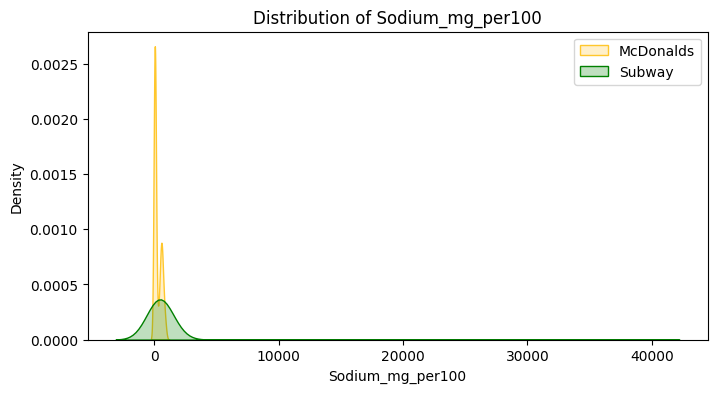

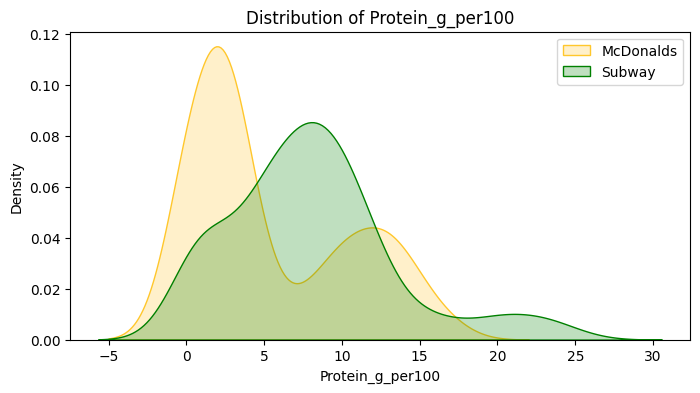

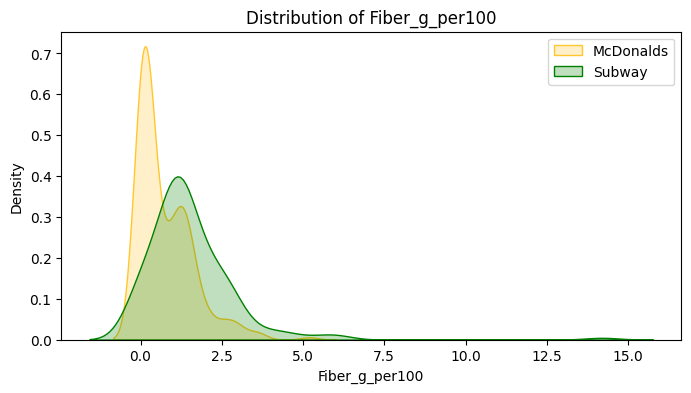

In [23]:
nutrient_per100 = ['Fat_g_per100', 'SatFat_g_per100', 'Sugars_g_per100', 'Sodium_mg_per100', 'Protein_g_per100', 'Fiber_g_per100']
for n in nutrient_per100:
    plt.figure(figsize=(8,4))
    sns.kdeplot(df_main.loc[df_main['Brand']=='McDonalds', n].dropna(), label='McDonalds',fill=True, color='#FFC72C')
    sns.kdeplot(df_main.loc[df_main['Brand']=='Subway', n].dropna(), label='Subway',fill=True, color='green')
    plt.title(f'Distribution of {n}')
    plt.legend()
    plt.show()

* Fat_g_per100: 
    * McDonald's: Although there is a noticeable percentage of items with a greater fat content (10–20 g/100 g), the distribution is especially prominent at extremely low levels (0–5 g/100 g).
    * Subway: Some goods (such cheese and cookies) have more than 30 g/100 g, and the distribution moves toward higher levels with an emphasis on 7–12 g/100 g. Based on weight-normalized statistics, McDonald's offers both low-fat and higher-fat alternatives, but Subway's greater fat content in some items is due to optional add-ons.

* SatFat_g_per100:
    * Both brands have a peak distribution of 2-4 g/100 g, with most goods falling in the low-to-middle range.
        * McDonald's: Although there are some higher-fat alternatives (light right tail), the peak distribution is skewed to the left, with more products at very low fat levels than Subway.
        * Subway: The right tail is longer and is linked to higher-fat foods (cheese, cookies), but the peak is in the same range. Some outliers show variation between menu items, and the density is higher in the intermediate range (2–6 g/100 g).

* Sugars_g_per100:
    * The concentration peak of Subway products is modest (0–5 g/100 g), suggesting that most of the items include very little sugar.
    * Compared to Subway, McDonald's has a greater density in the upper mid-range and a bigger right-skewed peak (about 5–10 g/100 g). McDonald's offers a lengthy list of higher-sugar items, such as desserts. There aren't many high-end items at Subway, although some of them go to extremes (sub-peak ~40-50 g/100 g, like cookies).

* Sodium_mg_per100:
    * McDonald's: A narrow density line with a high peak, signifying better homogeneity.A distribution that is strongly concentrated at the low end (about 0-1,500 mg/100 g), with few extreme values.
    * Subway: There are several high outliers (>40,000 mg/100 g, such as spices) in a strongly right-skewed distribution. Adjusting for outliers (e.g., spices used in small amounts <1g/meal), the median aligns closer to 300-350 mg/100 g, suggesting variability, with certain products contributing to a higher average. 

* Protein_g_per100:
    * McDonald's:
        * There are two separate clusters: low (0-5 g/100 g) and middle (10-15 g/100 g).
        * Few foods have particularly high protein levels.
    * Subway:
        * Protein content peaks between 7-12 g/100 g, with certain foods exceeding 30 g/100 g.
        * This shows that Subway normally offers more protein.

* Fiber_g_per100:
    * McDonald's:
        * The distribution is highly concentrated near 0 g/100 g, with few fiber-rich foods.
    * Subway:
        * The density curve is larger, going above 15 g/100 g, showing that many goods have a high amount of fiber.
        * This is Subway's most prominent "healthy" feature.
        

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


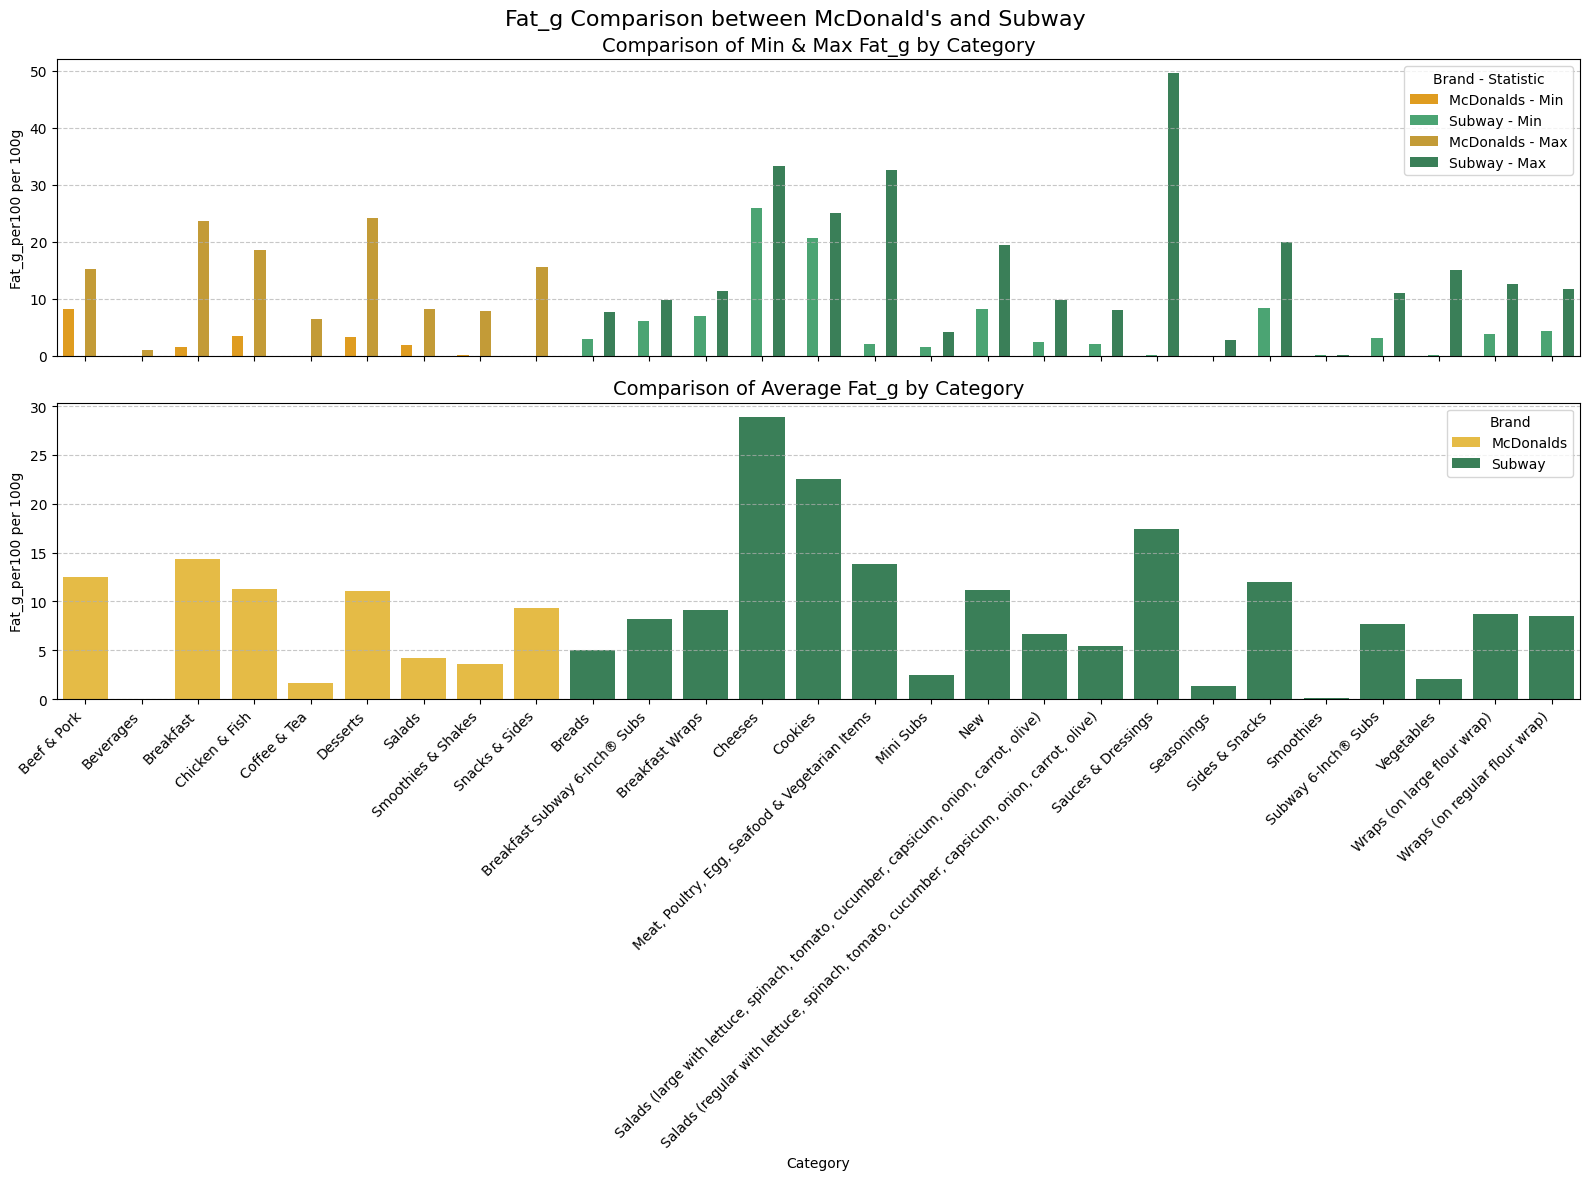

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


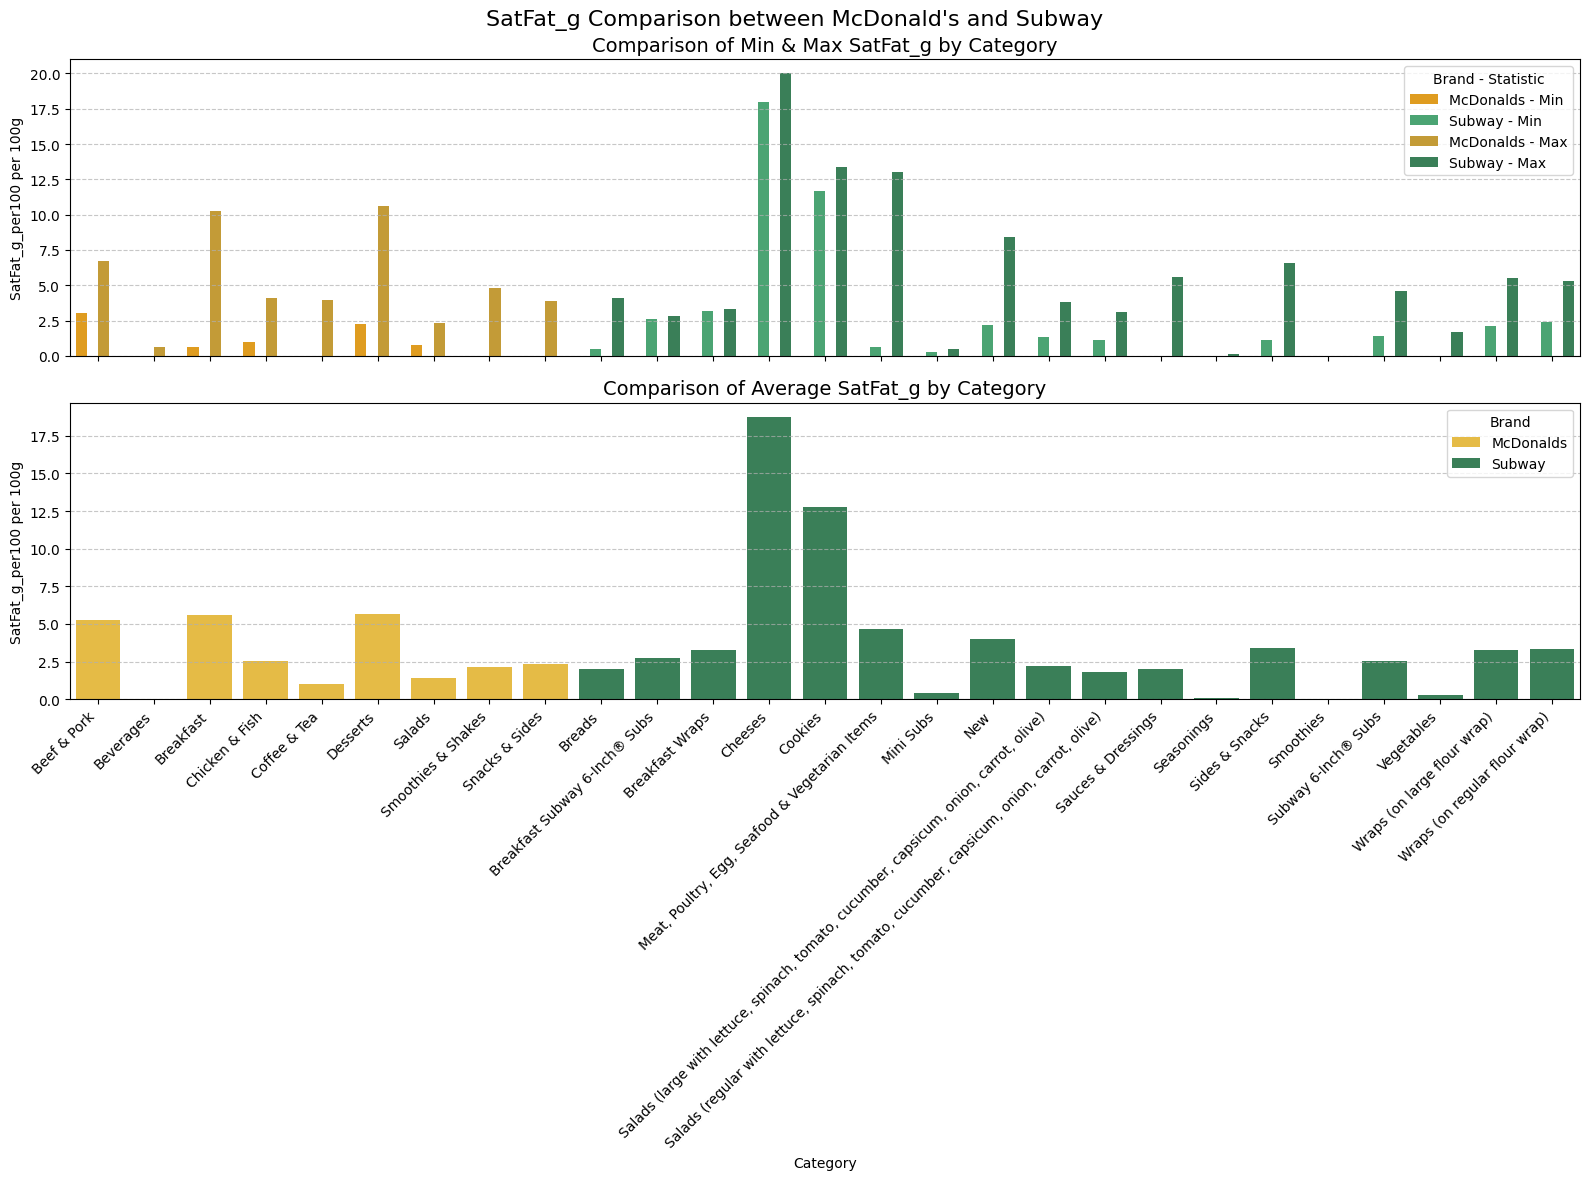

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


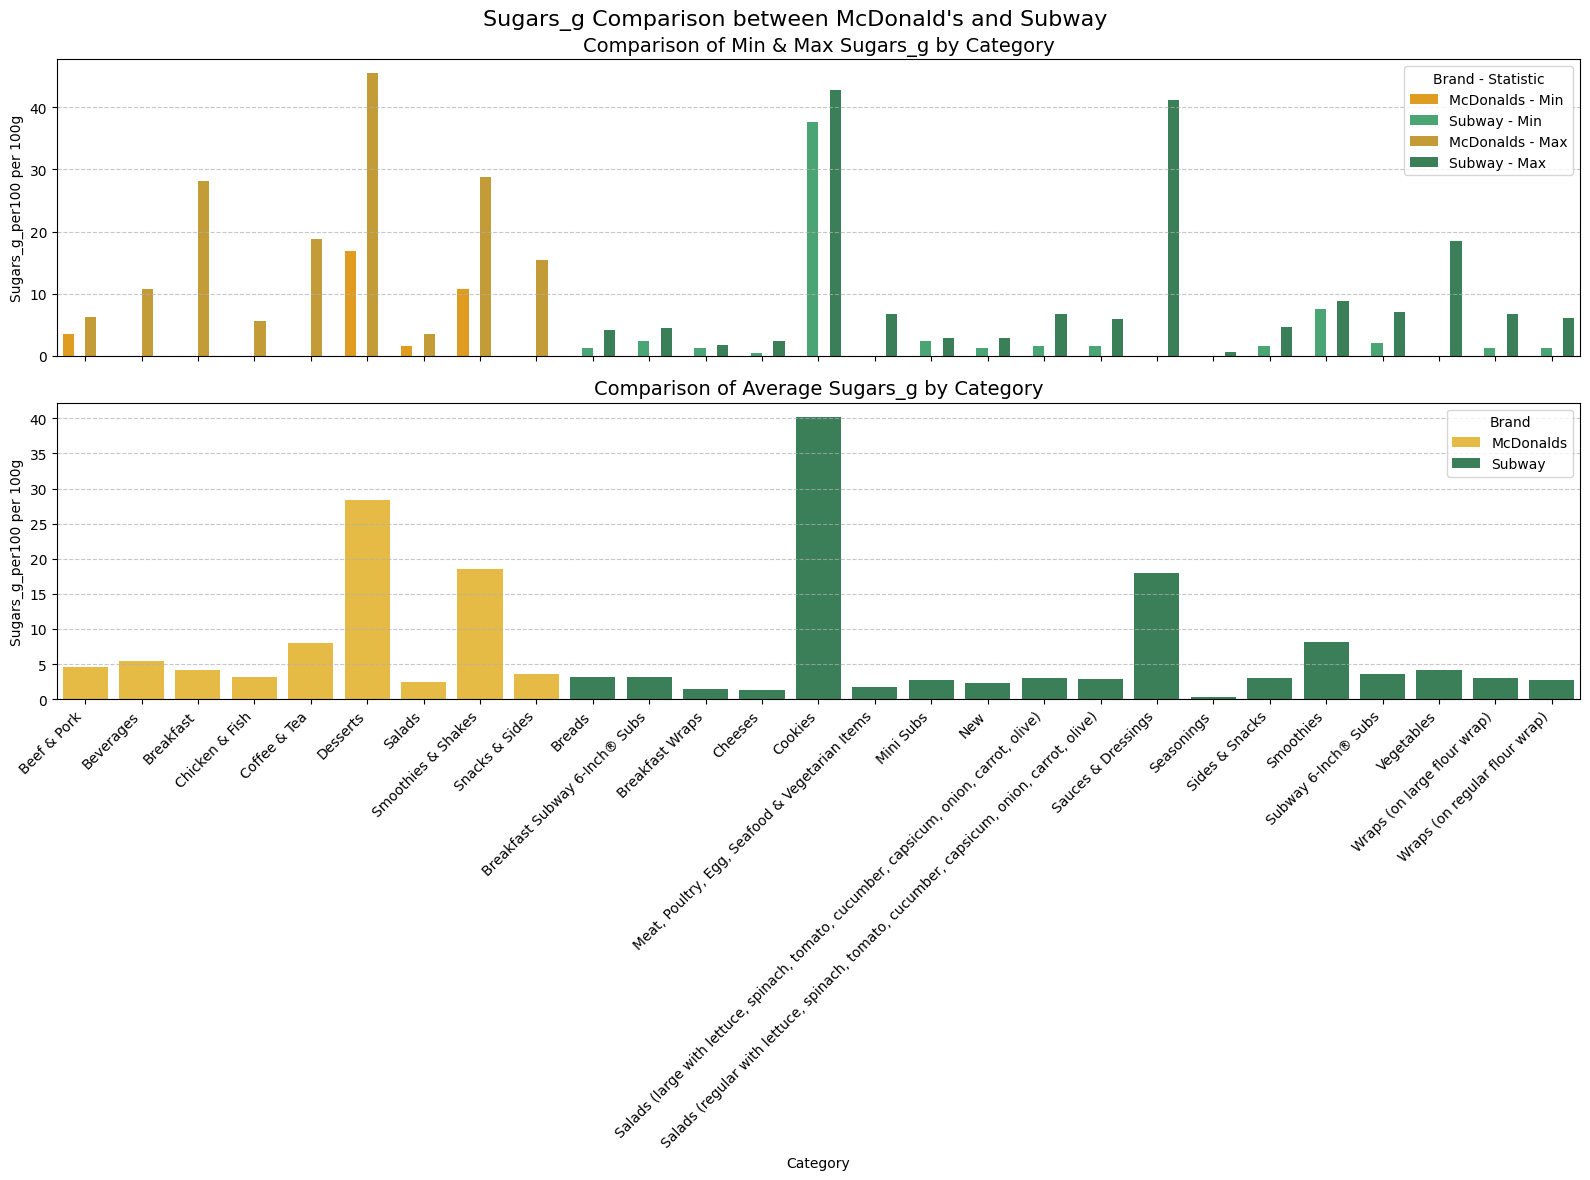

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


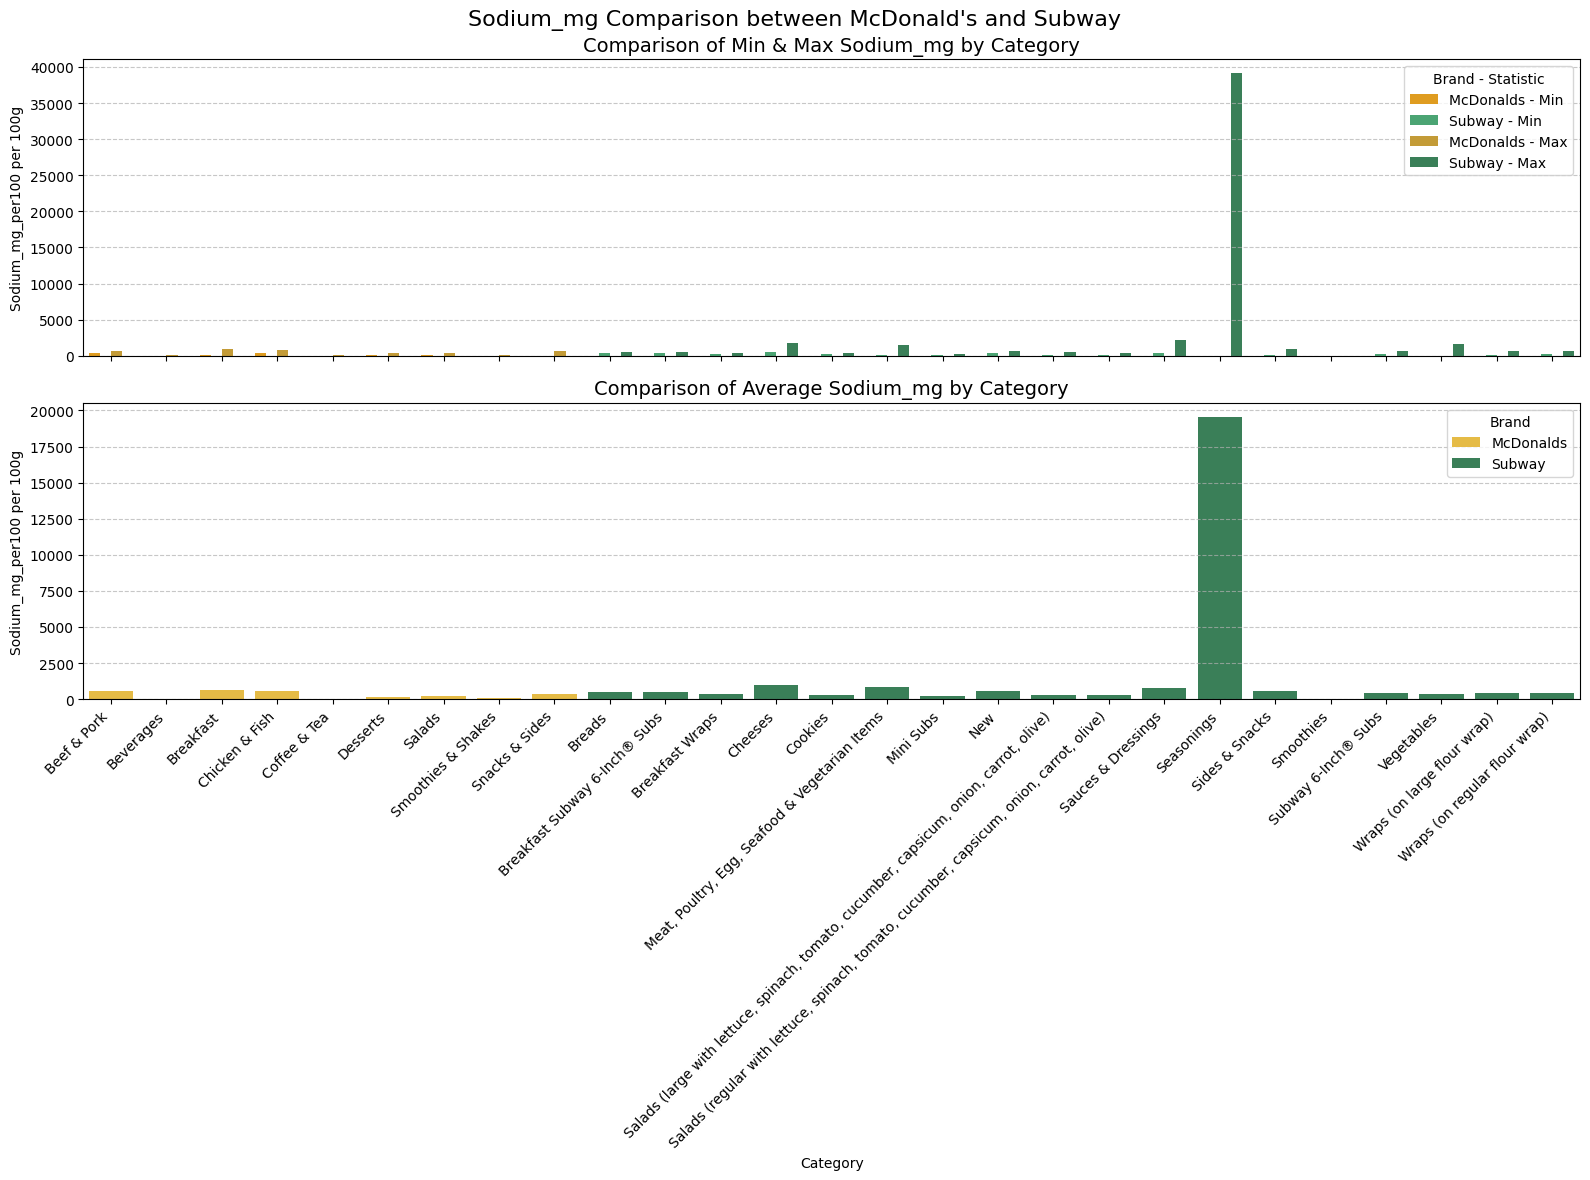

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


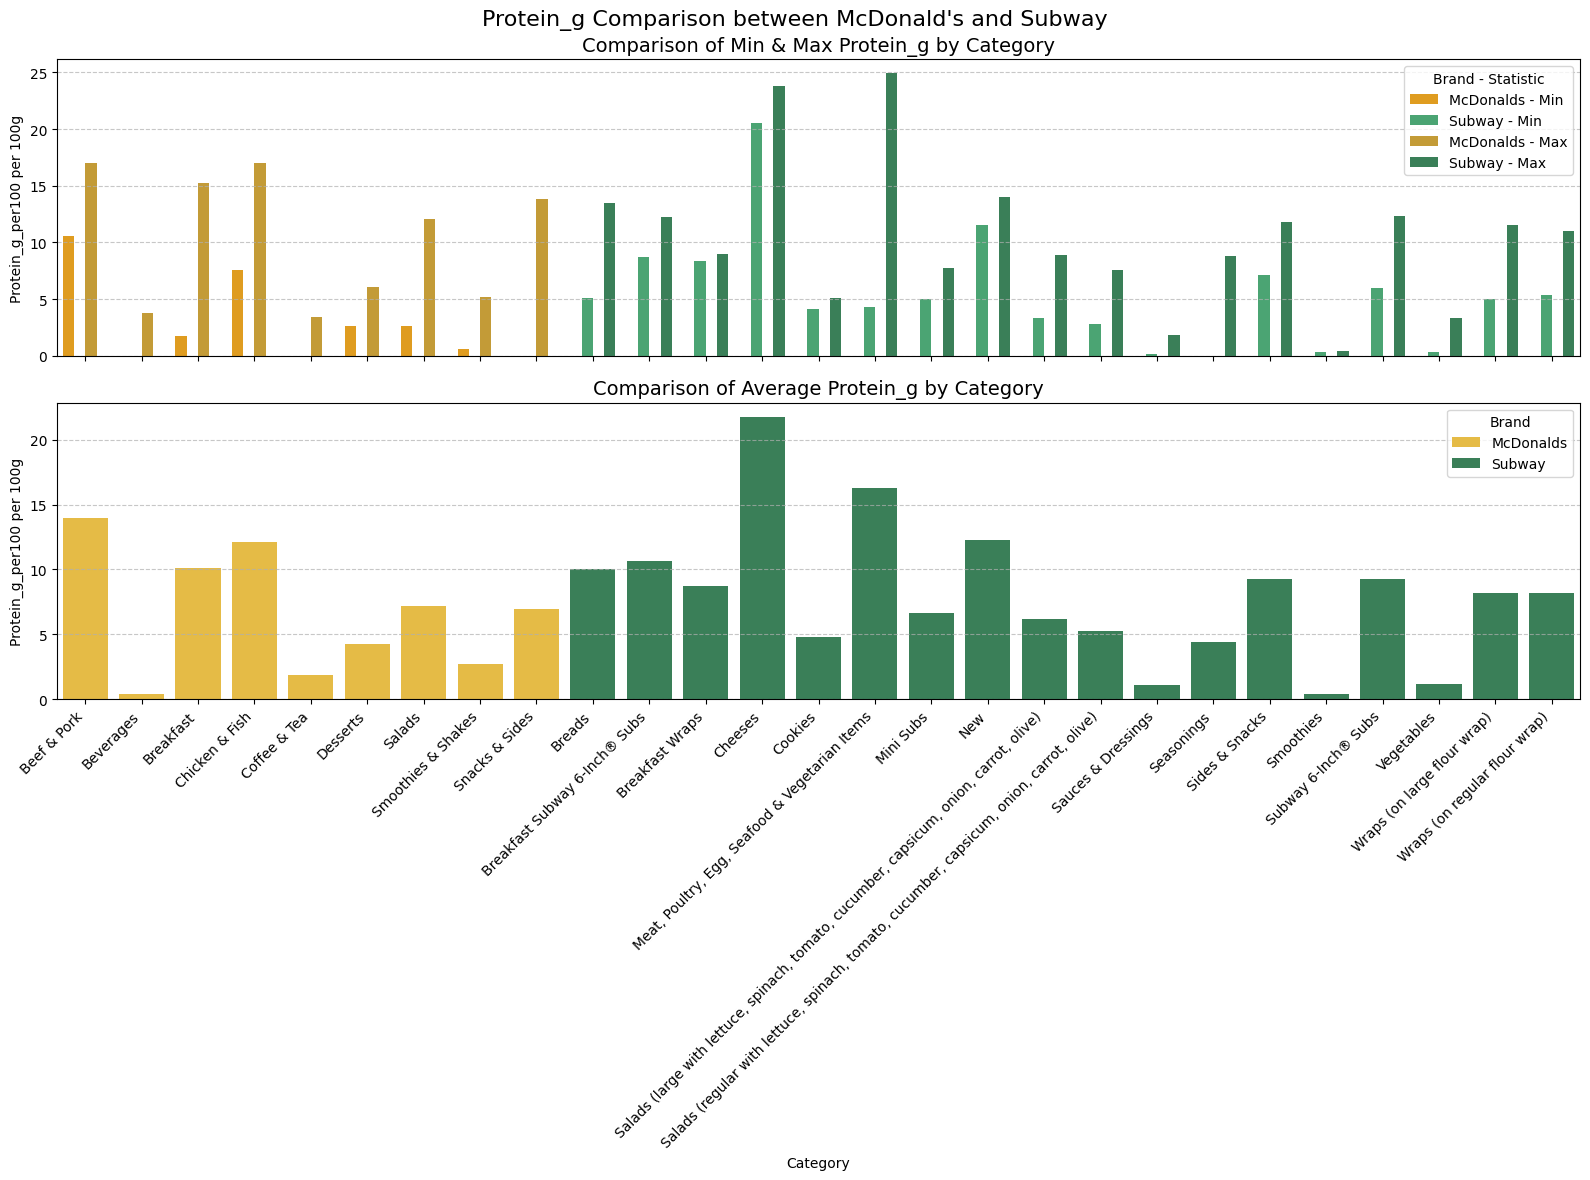

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\3021704329.py:45: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


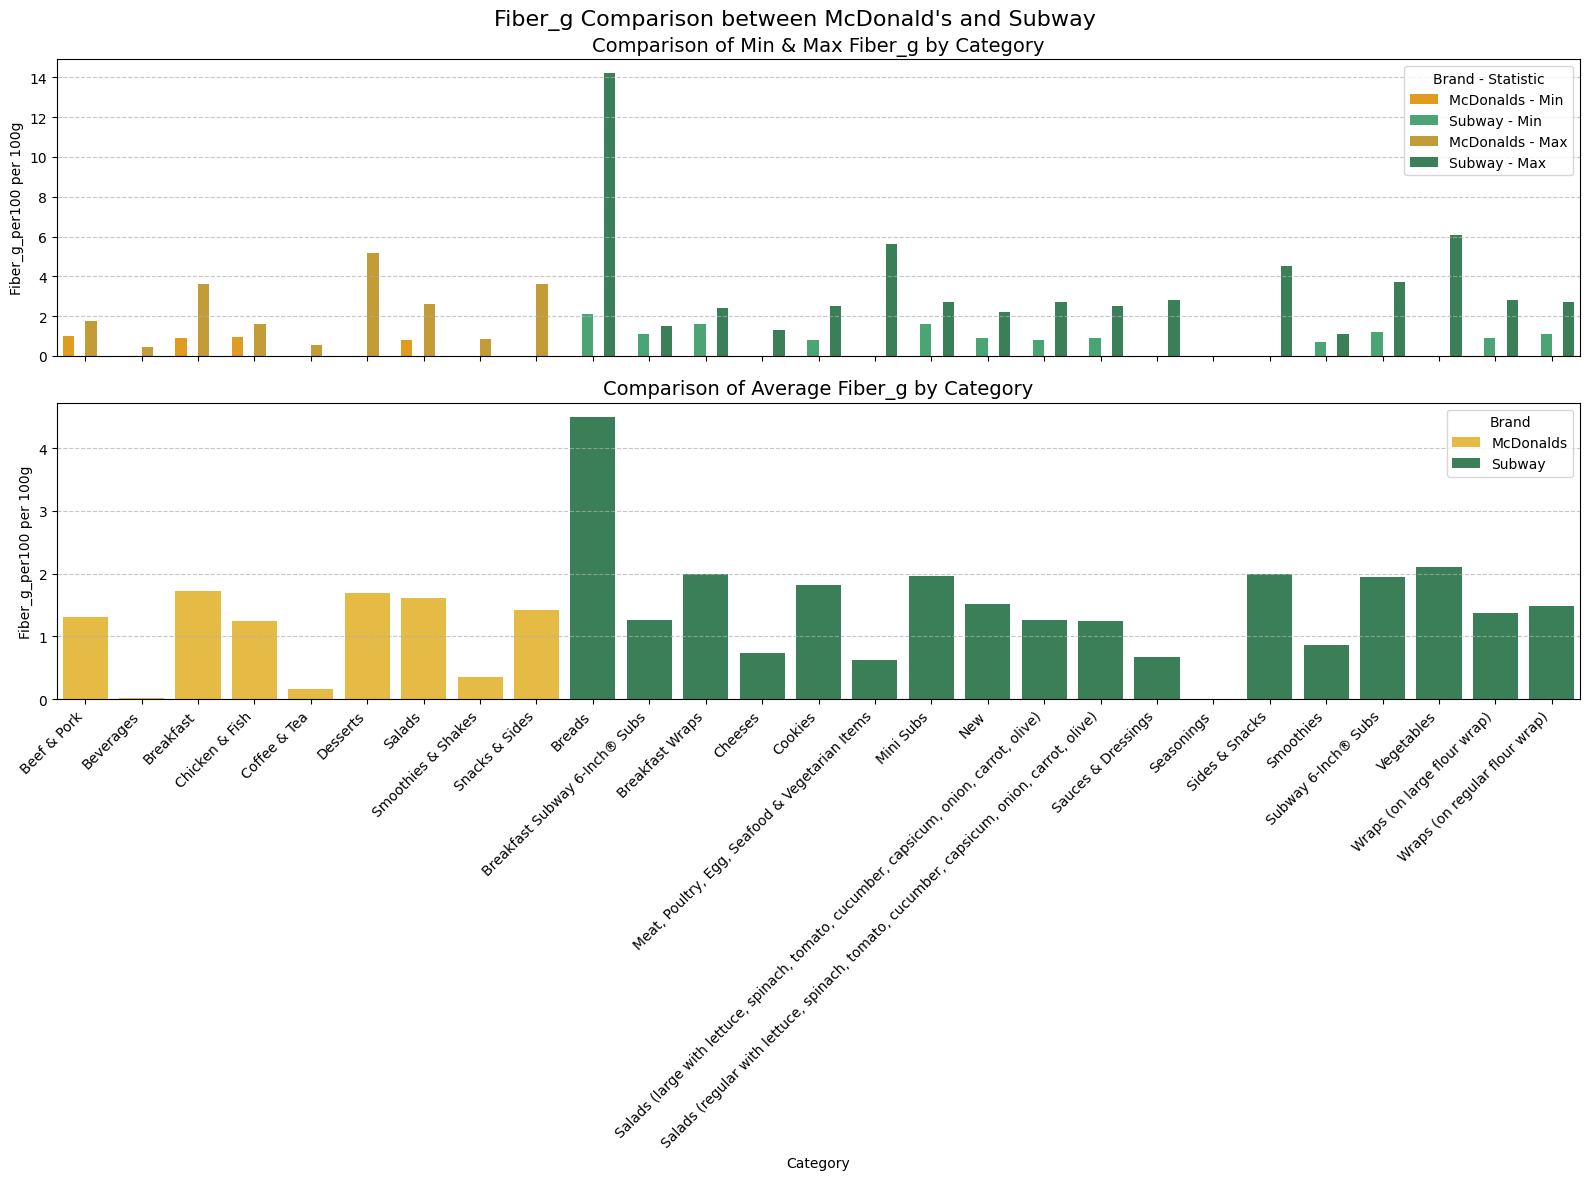

In [24]:
brand_palette = {"McDonalds": "#FFC72C", "Subway": "seagreen"}

group_palette = {
    "McDonalds - Min": "orange",
    "McDonalds - Max": "goldenrod",
    "Subway - Min": "mediumseagreen",
    "Subway - Max": "seagreen"
}

nutrients = ["Fat_g_per100", "SatFat_g_per100", 
             "Sugars_g_per100", "Sodium_mg_per100", 
             "Protein_g_per100", "Fiber_g_per100"]

for nutrient in nutrients:
    summary_stats = (
        df_main.groupby(['Brand', 'Category'])[nutrient]
        .agg(['min', 'mean', 'max'])
        .reset_index()
    )

    df_melted = summary_stats.melt(
        id_vars=['Brand', 'Category'], 
        value_vars=['min', 'mean', 'max'], 
        var_name='Statistic', value_name='Value'
    )

    df_minmax = df_melted[df_melted['Statistic'].isin(['min', 'max'])].copy()
    df_mean = df_melted[df_melted['Statistic'] == 'mean'].copy()

    df_minmax['Group'] = df_minmax['Brand'] + " - " + df_minmax['Statistic'].str.capitalize()

    fig, axes = plt.subplots(2, 1, figsize=(16, 12), sharex=True)

    # Subplot 1: Min & Max
    sns.barplot(
        data=df_minmax, x="Category", y="Value", hue="Group",
        palette=group_palette, ci=None, ax=axes[0]
    )
    axes[0].set_title(f"Comparison of Min & Max {nutrient.replace('_per100','')} by Category", fontsize=14)
    axes[0].set_ylabel(f"{nutrient} per 100g")
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0].legend(title="Brand - Statistic")

    # Subplot 2: Mean
    sns.barplot(
        data=df_mean, x="Category", y="Value", hue='Brand',
        palette=brand_palette, ci=None, ax=axes[1]
    )
    axes[1].set_title(f"Comparison of Average {nutrient.replace('_per100','')} by Category", fontsize=14)
    axes[1].set_ylabel(f"{nutrient} per 100g")
    axes[1].set_xlabel("Category")
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1].legend(title="Brand")

    plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

    plt.suptitle(f"{nutrient.replace('_per100','')} Comparison between McDonald's and Subway", 
                 fontsize=16, y=0.98)

    plt.tight_layout()
    plt.show()


* Fat_g_per100: 
    * Minimum and maximum values by category: 
        * Subway: There is a lot of variation; many categories have low minimums but high maximums (e.g., cheese, cookies, dressings > 40-50 g/100 g). 
        * McDonald's: The category is fairly homogeneous; fat varies but rarely reaches 25 g/100 g. Choosing things like cheese or cookies might result in greater fat levels than McDonald's averages, but Subway offers a variety of selections ranging from low to high fat content.

    * Average by Category: 
        * Subway: Many categories have greater average fat content (e.g., cheese ~25 g/100 g, cookies ~20 g/100 g, dressings ~15 g/100 g), impacted by optional high-fat components. 
        * McDonald's: Average fat categories generally include 5-12 g/100 g. McDonald's fat distribution is more evenly distributed across categories, but Subway's higher averages are a result of add-on selections.

* SatFat_g_per100:
    * McDonald's:
        * Many categories have elevated fat saturation yet are evenly distributed (e.g., beef and pork, breakfast, and dessert).
        * The average is quite consistent at 4-7 g/100 g, with a few higher extremes.
        * The distribution appears to be more concentrated, with only a few groups reaching elevated levels.
    * Subway:
        * Cheese and cookies have high SatFat_g values, peaking at around 20 g/100 g, reflecting maximums with heavy use.
        * There is a considerable range between groups: several are very low (salads, veggies), while some are higher, indicating variability.
        * Many categories' averages are lower than McDonald's, but are influenced by outliers like cheese and sweets, suggesting a need to consider typical serving sizes.

* Sugars_g_per100:
    * McDonald's:
        * Desserts, smoothies, and salads are among the categories with the highest sugar content, with an average of 30-35 g per 100 g.
        * There is also significant variance within each group, indicating both low-sugar and high-sugar options.
        * Some basic groupings (beef and pork, chicken and fish) contain relatively little sugar.
    * Subway:
        * The majority of the categories have very low sugar content (less than 5 g/100 g).
        * However, some items like cookies, sauces, dressings, and seasonings exceed 40 g/100 g, reflecting variability due to optional ingredients.
        * The average for each category is often lower than McDonald's, though outliers raise the maximum significantly, possibly due to recipe differences.

* Sodium_mg_per100: 
    * McDonald's:
        * Min-Max: Most categories have a small range with no outliers.
        * Average: All categories are in the low range (0-1,500 mg/100 g).
    * Subway:
        * Some categories (such as Seasonings and Snacks) have high maximums (more than 40,000 mg/100 g), driven by seasoning outliers.
        * Average: Outliers cause certain groups' averages to rise; adjusting for these (e.g., seasonings <1g/meal), the average aligns closer to 300-350 mg/100 g, still higher than McDonald's.

* Protein_g_per100:
    * McDonald's.
        * Min-Max: A narrower range with fewer high protein products.
        * Average: The meat, breakfast, chicken, and fish groups offer good averages (10-15 g/100 g).
    * Subway:
        * Min-Max: Many categories have unusually high protein content.
        * Subway often has greater protein averages than McDonald's in a variety of categories.

* Fiber_g_per100:
    * McDonald's:
        * The majority of categories have a minimum-maximum value of 5 g per 100 g.
        * Fiber levels are rather low in most categories.
    * Subway:
        * Min-Max: Very broad, with categories such as 6-inch subs and breads exceeding 14 g/100 g.
        * Average: Many categories have averages of more over 2 g/100 g, which is much more than McDonalds.

1. Perception versus Reality of "Healthy" Positioning
    Subway promotes itself as a healthy option, with advantages such as increased fiber and protein availability compared to McDonald's. However, its menu includes items with elevated levels of fat, sodium, or sugar (e.g., cookies, cheese, sauces, seasonings), sometimes comparable to McDonald's offerings.
2. Range and Consistency
    * McDonald's: More diverse, with the menu ranging from very low-calorie, low-fat options (salads, water) to higher-calorie items (fried dishes, desserts). This allows customers to choose lighter or richer options based on preference.
    * Subway: More consistent across categories, but includes extremes (e.g., sodium in spices > 40,000 mg/100 g, high saturated fat in cheese).
3. Nutrient density
    * Calories and Fat: Subway's categories (cookies, cheese, and dressings) frequently have more caloric density and fat content than McDonald's, indicating "hidden heaviness."
    * Saturated Fat and Sugar: Both companies sell harmful goods, but McDonald's has more consistent distributions, whereas Subway's dangers are concentrated in specific groups.
    * Sodium is a major problem for Subway, caused by a few severe categories rather than the entire menu.
    * Fiber and protein: Subway routinely outperforms McDonald's in this category, indicating its best "healthy" advantage.

Subway is not generally healthy. Instead, it provides more opportunities for balanced nutrition (protein, fiber), but also more risk if clients select the wrong goods (high-fat cheese, salty seasoning, sweet pastries). McDonald's, while sometimes regarded as "unhealthy," has a clearer segmentation: customers can indulge or choose genuinely light selections.


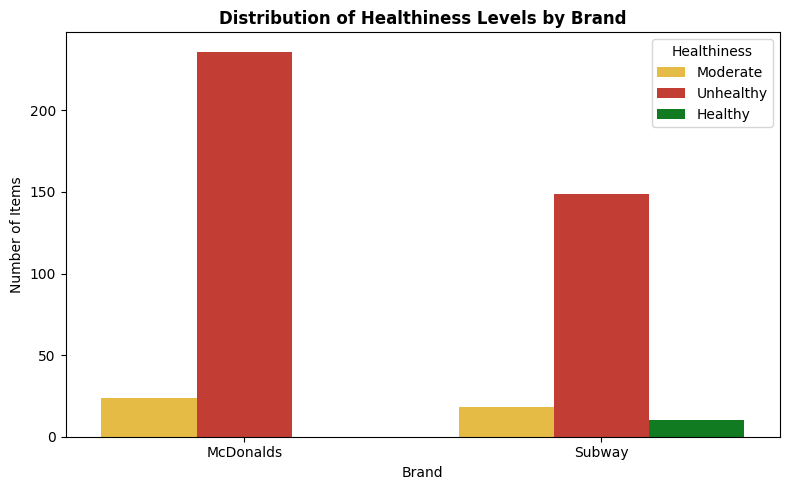

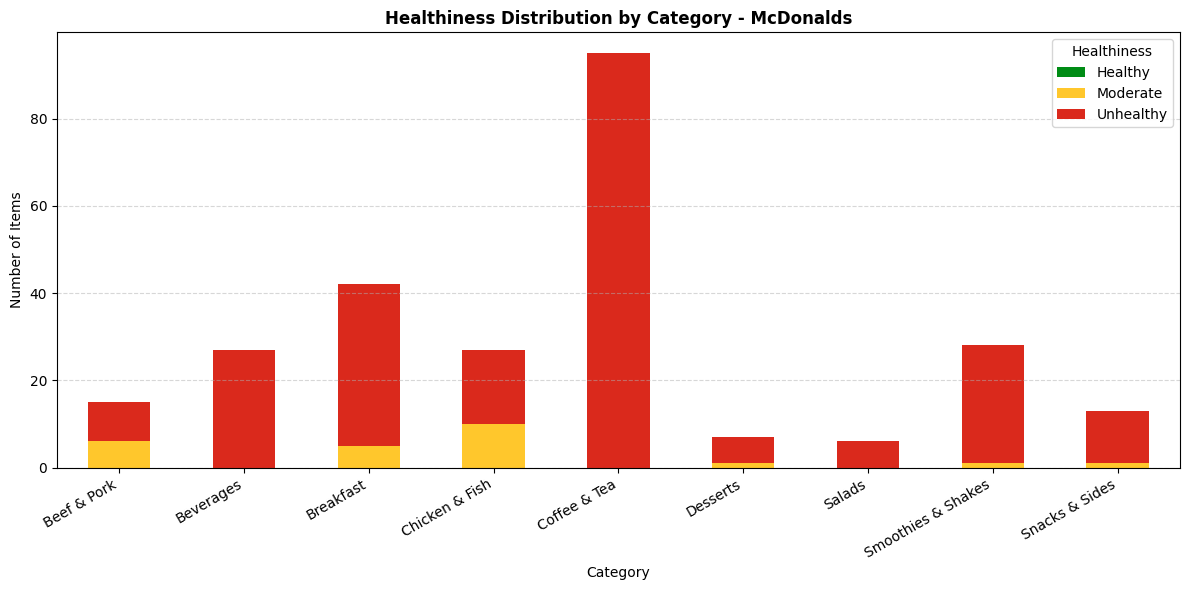

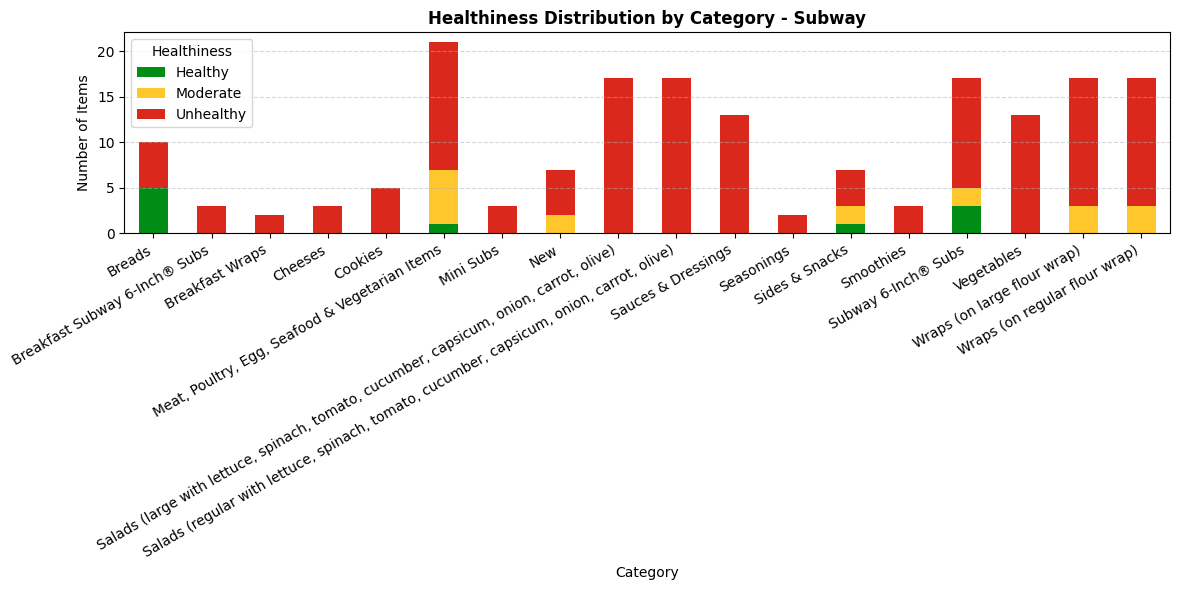

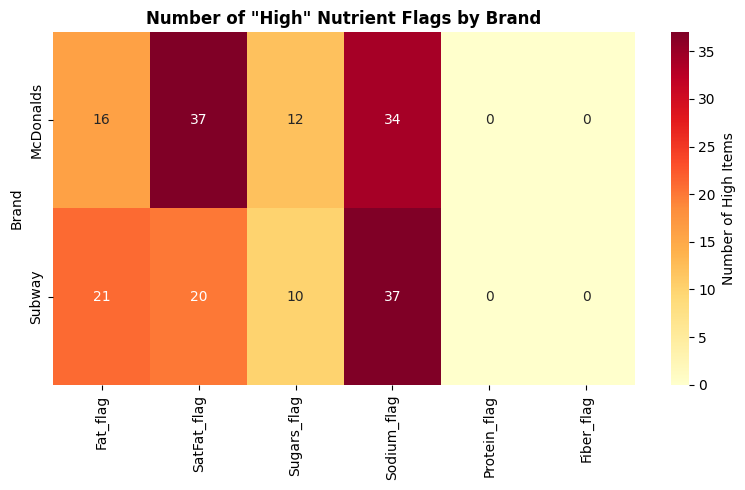

In [25]:
def classify_healthiness(row):
    # List of risk flags
    risk_flags = ['Fat_flag', 'SatFat_flag', 'Sugars_flag', 'Sodium_flag']
    high_count = sum(row[c] == 'High' for c in risk_flags)
    protein_good = row['Protein_flag'] == 'Good'
    fiber_good = row['Fiber_flag'] == 'Good'

    # Healthy: Both protein and fiber good, no risk flag is High
    if protein_good and fiber_good and high_count == 0:
        return 'Healthy'
    # Moderate: At least one protein/fiber good, only one risk flag is High
    elif (protein_good or fiber_good) and high_count == 1:
        return 'Moderate'
    # Unhealthy: More than one risk flag High, or neither protein nor fiber is Good
    else:
        return 'Unhealthy'

df_main['Healthiness'] = df_main.apply(classify_healthiness, axis=1)
health_palette = {
    'Healthy': '#008C15',    
    'Moderate': '#FFC72C',    
    'Unhealthy': '#DA291C'    
}
# --- Plot 1: Distribution by Brand ---
health_counts = df_main.groupby(['Brand', 'Healthiness'])['Item'].count().reset_index()
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(
    data=health_counts,
    x='Brand', y='Item',
    hue='Healthiness',
    palette=health_palette,
    ax=ax
)

ax.set_title('Distribution of Healthiness Levels by Brand', weight='bold')
ax.set_ylabel('Number of Items')
ax.set_xlabel('Brand')
plt.tight_layout()
plt.show()

# --- Plot 2: Category-level stacked bar chart ---
cat_health = df_main.groupby(['Brand', 'Category', 'Healthiness'])['Item'].count().reset_index()
cat_pivot = cat_health.pivot_table(
    index=['Brand', 'Category'],
    columns='Healthiness',
    values='Item',
    fill_value=0
).reset_index()

for brand in cat_pivot['Brand'].unique():
    dfb = cat_pivot[cat_pivot['Brand'] == brand]
    dfb = dfb.set_index('Category')[['Healthy', 'Moderate', 'Unhealthy']]

    ax = dfb.plot(
        kind='bar',
        stacked=True,
        figsize=(12, 6),
        color=[health_palette['Healthy'],
               health_palette['Moderate'],
               health_palette['Unhealthy']]
    )

    ax.set_title(f'Healthiness Distribution by Category - {brand}', weight='bold')
    ax.set_ylabel('Number of Items')
    ax.set_xlabel('Category')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


flag_cols = ['Fat_flag', 'SatFat_flag', 'Sugars_flag', 'Sodium_flag', 'Protein_flag', 'Fiber_flag']
flag_summary = df_main.groupby('Brand')[flag_cols].apply(
    lambda x: (x == 'High').sum()   
).reset_index()

fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(
    flag_summary.set_index('Brand'),
    annot=True, fmt='d',
    cmap='YlOrRd',
    cbar_kws={'label': 'Number of High Items'},
    ax=ax
)

ax.set_title('Number of "High" Nutrient Flags by Brand', weight='bold')
plt.tight_layout()
plt.show()

* Subway boasts more "healthy" items than McDonald's and health-focused categories (such as salads and vegetables).
* However, the majority of Subway's menu remains unhealthy, with a high salt content that increases the risk of heart disease and high blood pressure.
* Subway has more total fat and sodium than McDonald's, but it has less saturated fat.
* Initial conclusion: Subway is "slightly healthier" in some categories (salads, vegetables), but not throughout the menu. This brand is more focused on marketing than on significant nutritional differences.

C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\884406135.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Selection"] = level
C:\Users\Admin\AppData\Local\Temp\ipykernel_30384\884406135.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected["Selection"] = level


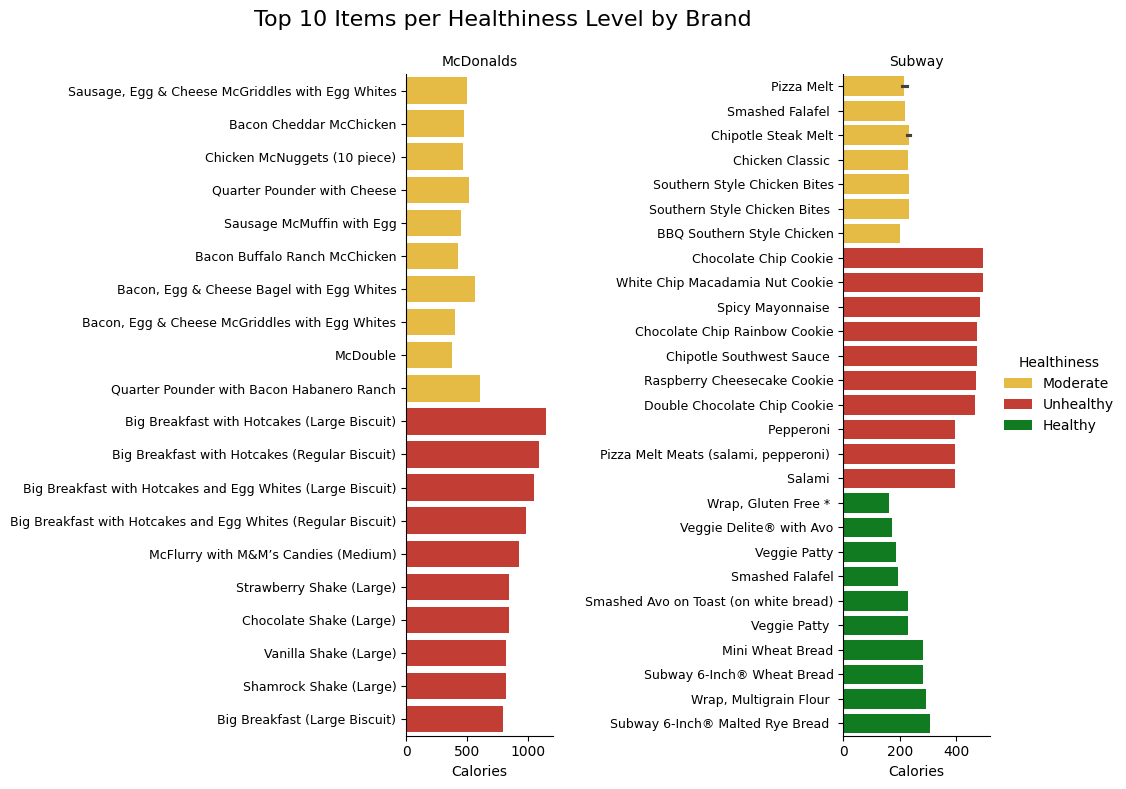

In [26]:
# --- Top 10 representative items by Healthiness per Brand ---
top_items = []

for brand in df_main['Brand'].unique():
    for level in ['Healthy', 'Moderate', 'Unhealthy']:
        dfb = df_main[(df_main['Brand'] == brand) & (df_main['Healthiness'] == level)]
        if len(dfb) == 0:
            continue

        if level == 'Healthy':
            df_selected = dfb.nsmallest(10, 'Calories')
        elif level == 'Unhealthy':
            df_selected = dfb.nlargest(10, 'Calories')
        else:  # Moderate 
            median_cal = dfb['Calories'].median()
            df_selected = dfb.iloc[(dfb['Calories'] - median_cal).abs().argsort()[:10]]

        df_selected["Selection"] = level  
        top_items.append(df_selected)

df_top10 = pd.concat(top_items)
g = sns.FacetGrid(
    df_top10,
    col="Brand",
    hue="Healthiness",
    sharex=False,
    sharey=False,
    height=8,
    aspect=0.7,
    palette={'Healthy':'#008C15','Moderate':'#FFC72C','Unhealthy':'#DA291C'}
)
g.map_dataframe(
    sns.barplot,
    x="Calories", y="Item",
    dodge=False
)

g.add_legend(title="Healthiness")
g.set_axis_labels("Calories", "Item")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flat:
    ax.tick_params(axis='y', labelsize=9)
    ax.set_ylabel("")

plt.subplots_adjust(top=0.9)
g.fig.suptitle("Top 10 Items per Healthiness Level by Brand", fontsize=16)
plt.show()


* McDonald's:
    * Moderate foods include all breakfast items. Limited "healthy" options are available, with recent 2025 updates (e.g., plant-based items) offering potential improvements.
    * Unhealthy foods include Big Breakfast combo goods (Big Breakfast with Hotcakes) and desserts (McFlurry, Shakes), all of which have high calories (> 800 cal).
    McDonald's menu contains few "healthy" selections, with popular items often high in calories.
* Subway:
    * There are several healthy options, including Gluten-Free Wrap, Veggie Delite®, Veggie Patty, and Mini Wheat Bread.
    * Higher-calorie products include cookies, sauces, and processed meats (such as salami and pepperoni), which can impact health if overconsumed.
    
Subway offers healthier selections, but higher-calorie sides and condiments may affect outcomes if not chosen carefully.


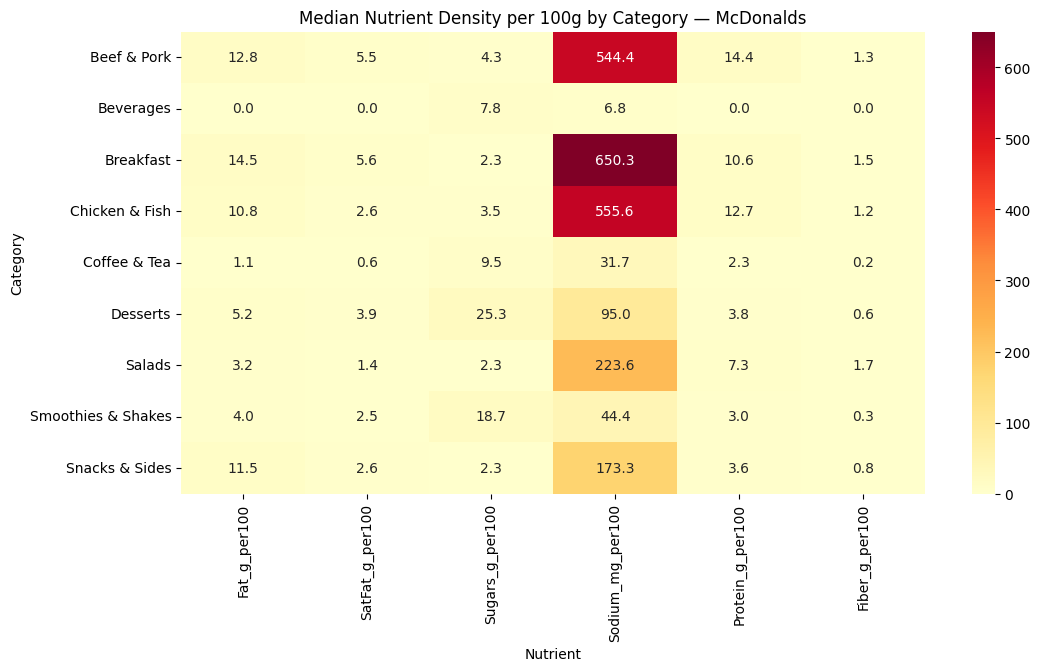

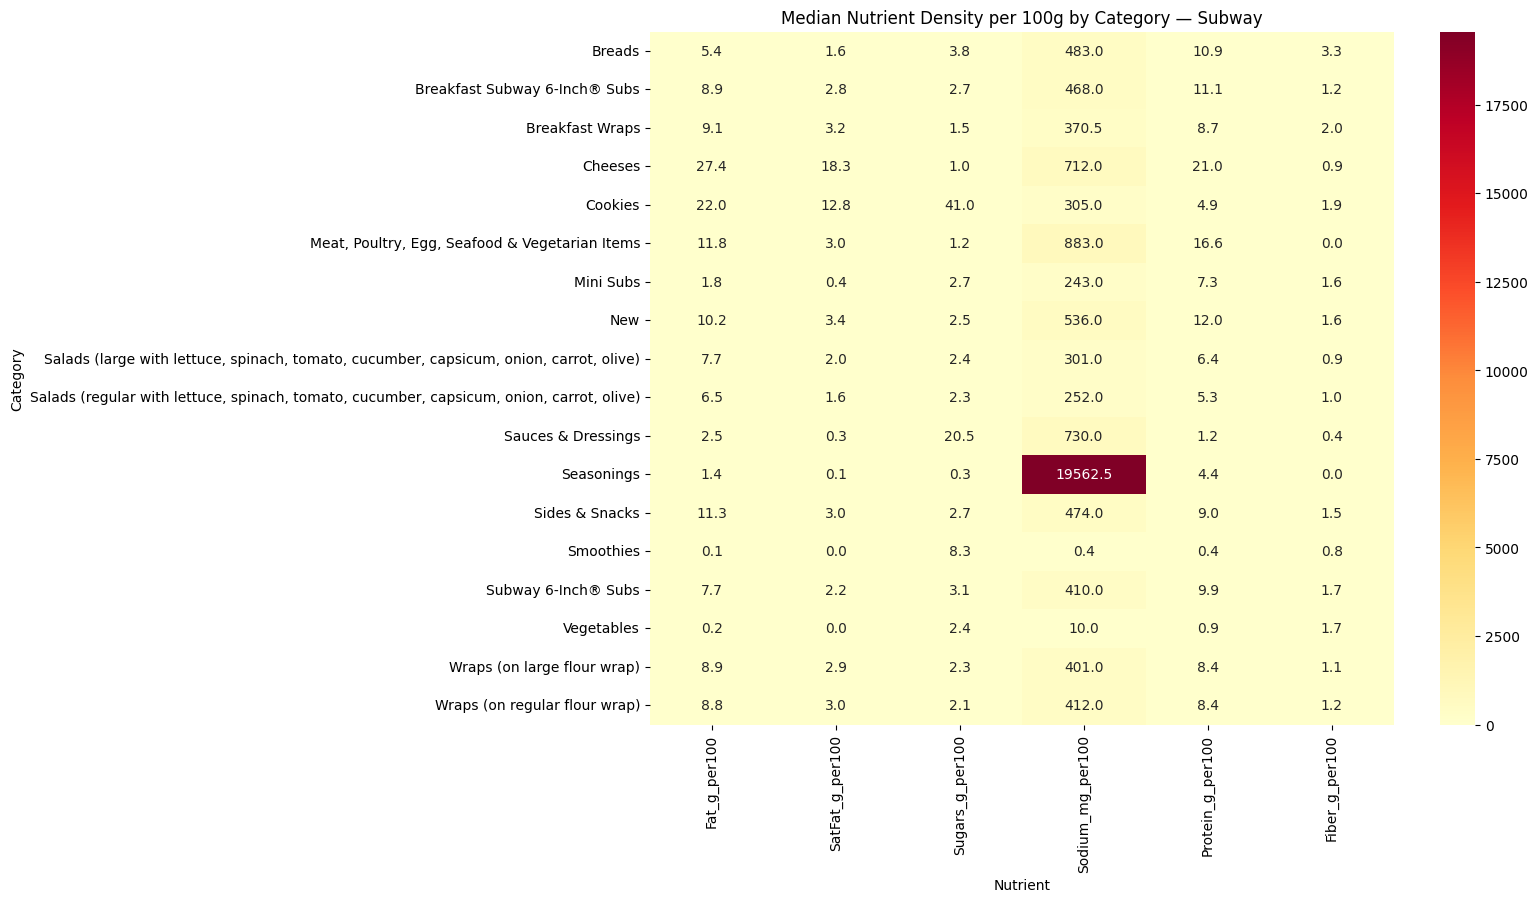

In [27]:
# 5. Category-level heatmap — nutrient density
for brand in df_main['Brand'].unique():
    dfb = df_main[df_main['Brand'] == brand]
    cat_medians = dfb.groupby('Category')[nutrients].median()
    plt.figure(figsize=(12, max(6, 0.5*len(cat_medians))))
    sns.heatmap(cat_medians, annot=True, fmt=".1f", cmap="YlOrRd")
    plt.title(f"Median Nutrient Density per 100g by Category — {brand}")
    plt.ylabel("Category")
    plt.xlabel("Nutrient")

* Median Nutrient Density per 100g by Category
    * McDonald’s:
        * The Breakfast and Chicken & Fish categories have notably high salt levels.
        * Breakfast has 650.3 mg/100 g.
        * Chicken and fish: 555.6 mg/100g.
        * The highest saturated fat content is found in beef and pork (5.5 g/100g) and breakfast (5.6 g/100g).
        * Sugar levels are elevated in desserts (25.3 g/100g) and smoothies and shakes (18.7 g/100g).
        * Only beef and pork (14.4 g) and chicken and fish (12.7 g) contain a high protein content.
        McDonald's breakfasts and desserts show high salt and sugar levels, with limited nutritional balance across categories.
    * Subway:
        * Seasonings contain a high 19,562 mg of sodium per 100g (outlier, likely pure seasoning); adjusting for realistic use (<1g/meal), averages drop significantly.
        * Sauces and dressings (730 mg per 100g) and cookies (305 mg per 100g) also contribute to sodium.
        * Cheeses (27.4 g per 100g) and cookies (22 g per 100g) are notably high in fat content.
        * Sugar levels peak in cookies (41 g per 100g), comparable to McDonald's desserts.

Subway excels in bread and salad (low fat and sodium). However, seasonings and sauces can significantly increase sodium and fat if used in larger amounts.

## Conclusion

1. Neither brand is inherently "healthy."
    * The majority of McDonald's and Subway menu items exceed recommended nutrient thresholds, indicating limited overall health benefits.
    * The perception of one brand (e.g., Subway) as "healthier" is shaped by marketing and customer customization rather than a consistent nutritional edge.
2. Subway’s health potential relies on customization.
    * Subway provides a range of healthy options (salads, vegetable subs, whole-grain bread), but add-ons like sauces, cheese, and cookies can elevate sodium, fat, and sugar levels.
    * Success in achieving a healthier meal depends on informed customer choices to avoid higher-calorie or high-sodium items.
3. McDonald's lacks extensive healthy customization.
    * Most menu items are high-calorie, with few moderate options and no robust "build-your-own" feature like Subway.
    * Breakfast combinations (high sodium) and desserts/smoothies (high sugar) highlight key nutritional concerns.
4. Marketing vs. Reality.
    * McDonald's is associated with higher saturated fat (linked to heart disease), while Subway stands out for elevated sodium (tied to blood pressure risk).
    * Some Subway categories (e.g., cheese, sauces, cookies) match or exceed McDonald's fat and sugar levels in desserts.
5. Quality over Quantity.
    * Subway’s "healthy design" offerings (e.g., salads) may have lower calories, but adding extras can push sodium and fat beyond McDonald's levels, affecting nutritional quality.

💡 The objective conclusion:
Neither McDonald's nor Subway can be deemed inherently healthy due to widespread nutrient excesses. Subway offers a slight health advantage through customizable options (e.g., higher fiber/protein potential), but this requires careful selection to mitigate risks from add-ons. McDonald's menu is predominantly high-calorie and high-fat, with limited flexibility for healthier choices. Ultimately, healthiness hinges on how customers order, not the brand itself. Note: Data reflects trends up to September 2025; recent updates (e.g., McD plant-based options, Subway low-sodium items) may influence results—verify with current nutrition data.

### Standout findings & concise conclusion — “Is Subway really healthier than McDonald’s?”

* Calorie density: Subway’s median calorie density is higher per 100 g (≈ 178 kcal/100 g) than McDonald’s (≈ 103 kcal/100 g).
    → Per-bite, Subway delivers more energy, despite its "healthier" branding.
* Fat vs. saturated fat: Subway has a higher median total fat (7.7 g/100 g) compared to McDonald’s (3.4 g/100 g), while McDonald’s has more items flagged for saturated fat (37 vs 20).
    → McDonald’s poses a greater saturated fat risk (heart-related), while Subway shows elevated total fat (e.g., cheese, dressings).
* Sugar: McDonald’s median sugar (5.5 g/100 g) exceeds Subway’s (2.6 g/100 g), but both offer high-sugar desserts/drinks; Subway cookies and sauces are comparable to McDonald’s desserts.
* Sodium (critical): Subway’s median sodium (394 mg/100 g) significantly exceeds McDonald’s (46 mg/100 g). Adjusting for outliers (e.g., seasonings <1g/meal), Subway remains higher, indicating a notable risk.
    → Elevated sodium in Subway’s processed meats and sauces is a key concern.
* Protein & fiber: Subway offers more protein and fiber (protein median slightly higher; fiber markedly higher), providing a nutritional edge when selecting veggie-rich items.
* Menu variability / range of risk:
    * McDonald’s = bimodal & extreme: many low-calorie items (drinks, salads) and high-calorie items (desserts, combos), with fewer unexpected extremes.
    * Subway = more consistent medians but variable: includes healthy options plus higher-fat/sodium items (cheese, cookies, sauces, seasonings) that can increase risk.

Subway does not consistently outperform McDonald’s in overall healthiness. It provides more opportunities for healthier choices (e.g., salads, veggie subs, higher fiber/protein), but elevated sodium and total fat levels in condiments and processed meats can offset these benefits. McDonald’s poses greater risks with saturated fat and high-calorie combos, but its menu extremes are more predictable. Health outcomes depend heavily on customer selections (e.g., minimizing sauces at Subway, avoiding fries at McD). Data reflects trends up to September 2025; recent menu updates (e.g., McD plant-based, Subway low-sodium) may alter findings—verify with current data.